In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

# Data Preprocessing for IBM HR Analytics Employee Attrition & Performance

## Data Profiling


- Age: Umur Karyawan
- Attrition: Karyawan Attrition (Keluar)
- BusinessTravel: Frekuensi Travel Karyawan
- DailyRate: Rate Harian
- Department: Divisi/Bidang pekerjaan
- DistanceFromHome: Jarak Rumah
- Education: Pendidikan (tahun)
- EducationField: Bidang Pendidikan
- EmployeeCount: Jumlah Karyawan
- EmployeeNumber: ID Karyawan
- Environment Satisfaction: Kepuasan Karyawan terhadap Lingkungan Kerja
- Gender: Jenis Kelamin
- HourlyRate: Rate per jam
- JobInvolvement: Keterlibatan Kerja
- JobLevel: Tingkat Pekerjaan
- JobRole: Jabatan/Peran
- JobSatisfaction: Kepuasan Karyawan terhadap Pekerjaan
- MaritalStatus: Status Pernikahan
- MonthlyIncome: Gaji per bulan
- MonthlyRate: Rate bulanan
- NumCompaniesWork: Pernah berkerja diberapa perusahaan
- Over18: Diatas 18 tahun
- Overtime: Ketersediaan Lembur
- PercentSalaryHike: Kenaikan gaji dalam persen
- PerformanceRating: Rating Kinerja
- RelationshipSatisfaction: Kepuasan terhadap Hubungan
- StandardHours: Jam berkerja
- StockOptionLevel: Pengalaman terhadap perdagangan saham (tahun)
- TotalWorkingYears: Pengalaman berkerja (tahun)
- TrainingTimeLastYear: Masa Training Tahun Lalu
- WorkLifeBalance: Keseimbangan pekerjaan dan kehidupan pribadi
- YearsAtCompany: Lama bekerja di perusahaan (tahun)
- YearsInCurrentRole: Lama bekerja di jabatan sekarang (tahun)
- YearsSinceLastPromotion: Lama terakhir promosi (tahun)
- YearsWithCurrManager: Lama bekerja dengan manager sekarang (tahun)


## Load Dataset

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Initial Data Inspection

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
print(df.shape)

(1470, 35)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print(df.describe(include='all'))

                Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Developm

## Reformating Data

In [ ]:
df['BusinessTravel'] = df['BusinessTravel'].replace({
    'Travel_Rarely': 'Rarely',
    'Travel_Frequently': 'Frequently',
    'Non-Travel': 'None'
})

## Handling Missing Values

In [ ]:
# Cek missing values
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


## Handling Duplicates

In [ ]:
# Cek duplicate rows
print(df.duplicated().sum())

# Menghapus duplicates
df = df.drop_duplicates()

0


## Columns to Drop (No Predictive Value)

In [ ]:
columns_to_drop = [
    'EmployeeCount',
    'StandardHours',
    'Over18',
    'EmployeeNumber',
]
df = df.drop(columns=columns_to_drop)

Menghapus kolom yang tidak berpengaruh terhadap proses penghitungan model
- EmployeeCount : karena jumlah karyawan semua nilainya 1 atau tidak bervariasi
- StandardHours : karena jam bekerja setiap karyawan semua nilainya 80 atau tidak bervariasi
- Over18 : karena semua karyawan usianya diatas 18 atau nilainya tidak bervariasi
- EmployeeNumber : karena hanya sebagai ID atau identitas dari setiap karyawan sehingga tidak memiliki pengaruh terhadap proses model

## Numerical and Categorical

In [ ]:
# Pilih kolom dengan tipe data numerik saja
nums = df.select_dtypes(['float64', 'int64']).columns

# Pilih kolom dengan tipe data kategorik saja
cats = df.select_dtypes(['object']).columns

## View Statistical Summary

In [ ]:
from IPython.display import display, HTML

def describe_categorical(df, cols):
    return df[cols].astype('category').describe()

In [ ]:
display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Numerical Features</h5></b></center>'))
display(df[nums].describe())

display(HTML('<center><b><h3>Statistics Description of Dataset</h3></b></center><center><b><h5>Categorical Features</h5></b></center>'))
describe_categorical(df, cats)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


## Univariate Analysis

### Outlier Data Numerikal (Boxplot)

Text(0.5, 1.0, 'Outlier Age')

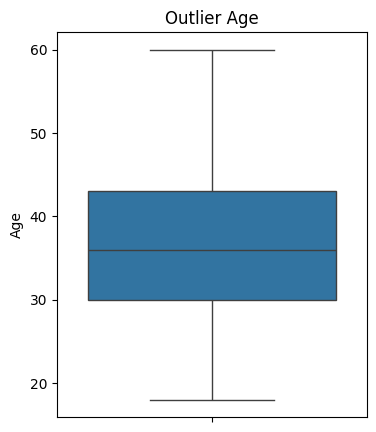

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['Age'])
plt.title('Outlier Age')

Text(0.5, 1.0, 'Outlier DailyRate')

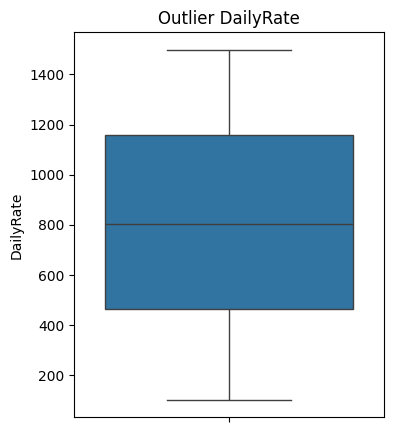

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['DailyRate'])
plt.title('Outlier DailyRate')

Text(0.5, 1.0, 'Outlier DistanceFromHome')

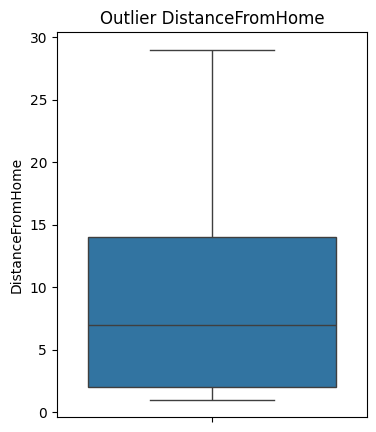

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['DistanceFromHome'])
plt.title('Outlier DistanceFromHome')

Text(0.5, 1.0, 'Outlier Education')

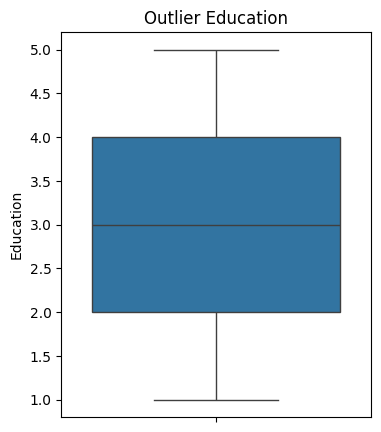

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['Education'])
plt.title('Outlier Education')

Text(0.5, 1.0, 'Outlier EnvironmentSatisfaction')

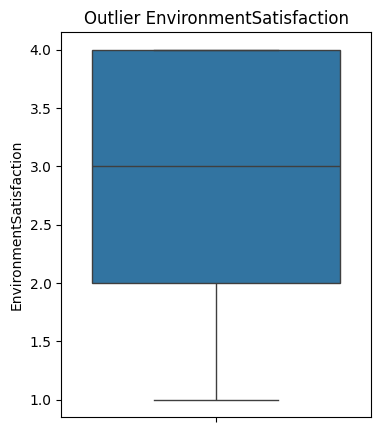

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['EnvironmentSatisfaction'])
plt.title('Outlier EnvironmentSatisfaction')

Text(0.5, 1.0, 'Outlier HourlyRate')

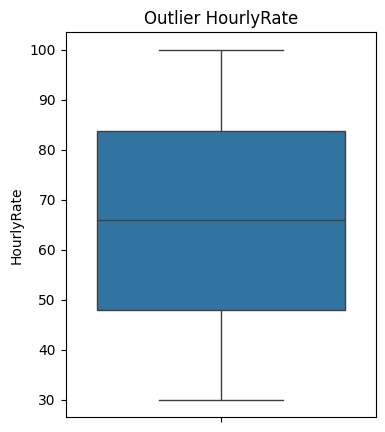

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['HourlyRate'])
plt.title('Outlier HourlyRate')

Text(0.5, 1.0, 'Outlier JobInvolvement')

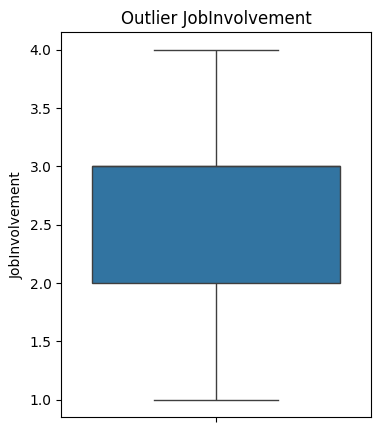

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['JobInvolvement'])
plt.title('Outlier JobInvolvement')

Text(0.5, 1.0, 'Outlier JobLevel')

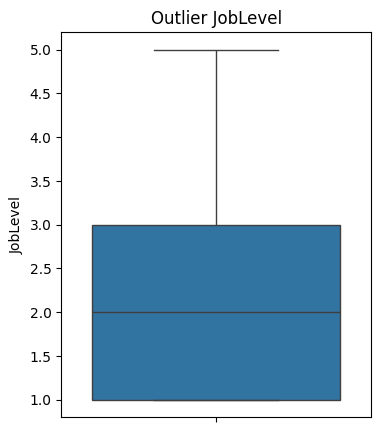

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['JobLevel'])
plt.title('Outlier JobLevel')

Text(0.5, 1.0, 'Outlier JobSatisfaction')

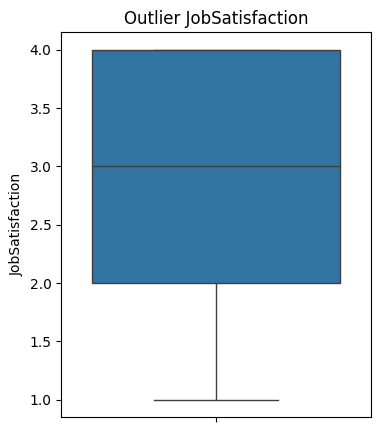

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['JobSatisfaction'])
plt.title('Outlier JobSatisfaction')

Text(0.5, 1.0, 'Outlier MonthlyIncome')

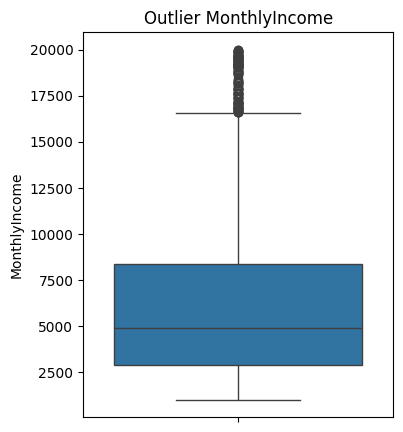

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['MonthlyIncome'])
plt.title('Outlier MonthlyIncome')

Text(0.5, 1.0, 'Outlier MonthlyRate')

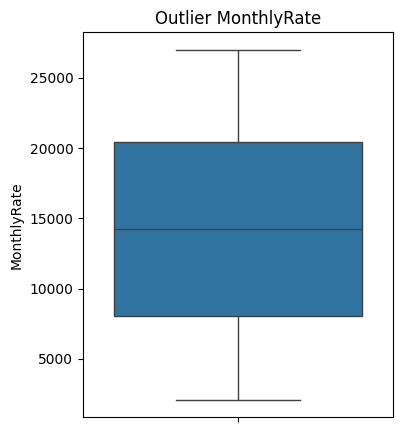

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['MonthlyRate'])
plt.title('Outlier MonthlyRate')

Text(0.5, 1.0, 'Outlier NumCompaniesWorked')

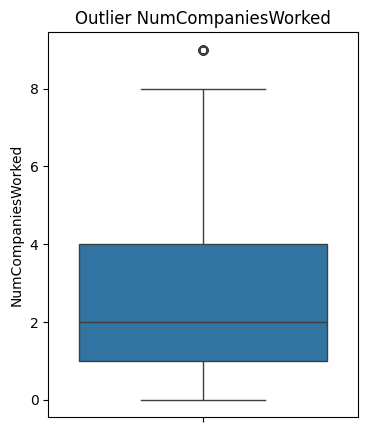

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['NumCompaniesWorked'])
plt.title('Outlier NumCompaniesWorked')

Text(0.5, 1.0, 'Outlier PercentSalaryHike')

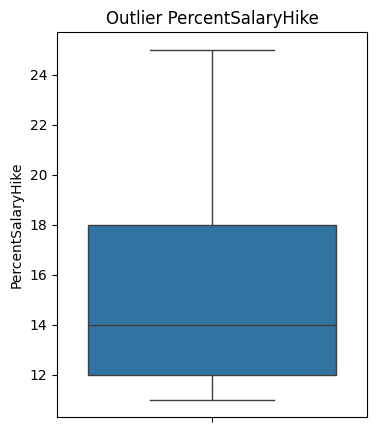

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['PercentSalaryHike'])
plt.title('Outlier PercentSalaryHike')

Text(0.5, 1.0, 'Outlier PerformanceRating')

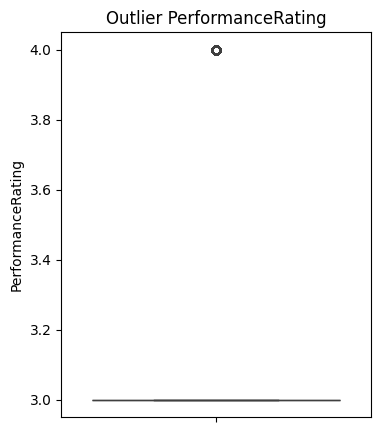

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['PerformanceRating'])
plt.title('Outlier PerformanceRating')

Text(0.5, 1.0, 'Outlier RelationshipSatisfaction')

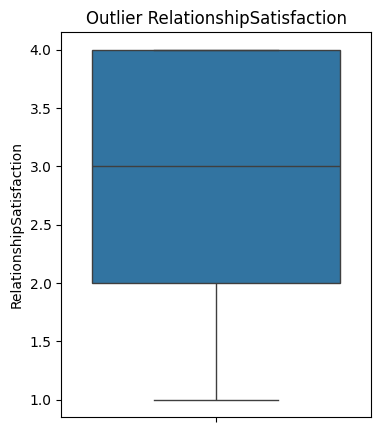

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['RelationshipSatisfaction'])
plt.title('Outlier RelationshipSatisfaction')

Text(0.5, 1.0, 'Outlier StockOptionLevel')

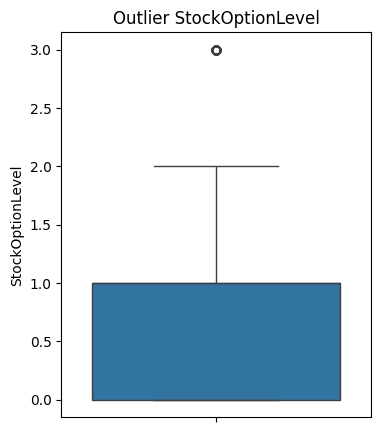

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['StockOptionLevel'])
plt.title('Outlier StockOptionLevel')

Text(0.5, 1.0, 'Outlier TotalWorkingYears')

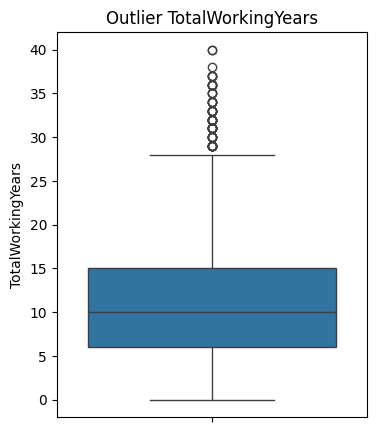

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['TotalWorkingYears'])
plt.title('Outlier TotalWorkingYears')

Text(0.5, 1.0, 'Outlier TrainingTimesLastYear')

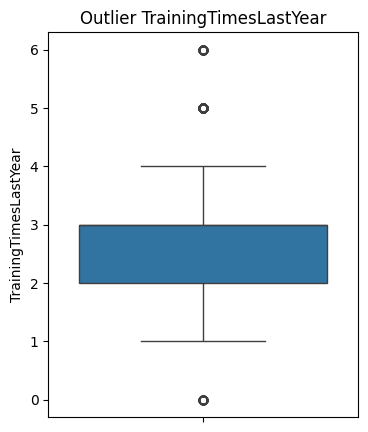

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['TrainingTimesLastYear'])
plt.title('Outlier TrainingTimesLastYear')

Text(0.5, 1.0, 'Outlier WorkLifeBalance')

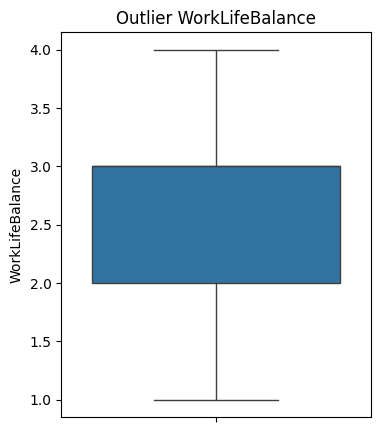

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['WorkLifeBalance'])
plt.title('Outlier WorkLifeBalance')

Text(0.5, 1.0, 'Outlier YearsAtCompany')

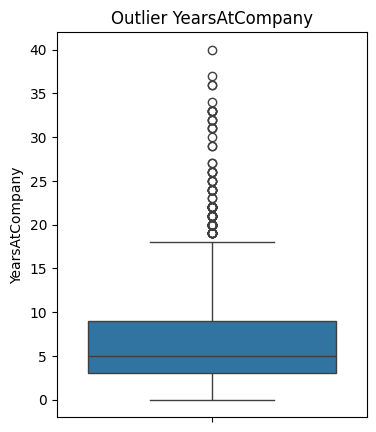

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsAtCompany'])
plt.title('Outlier YearsAtCompany')

Text(0.5, 1.0, 'Outlier YearsInCurrentRole')

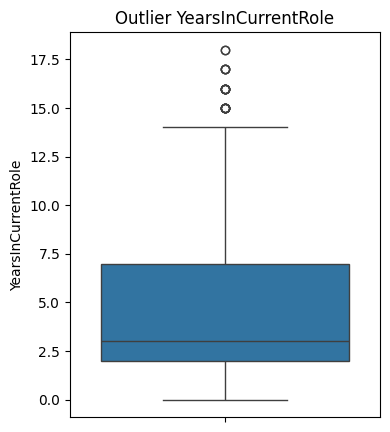

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsInCurrentRole'])
plt.title('Outlier YearsInCurrentRole')

Text(0.5, 1.0, 'Outlier YearsSinceLastPromotion')

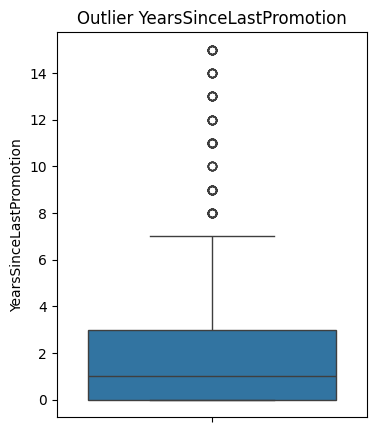

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsSinceLastPromotion'])
plt.title('Outlier YearsSinceLastPromotion')

Text(0.5, 1.0, 'Outlier YearsWithCurrManager')

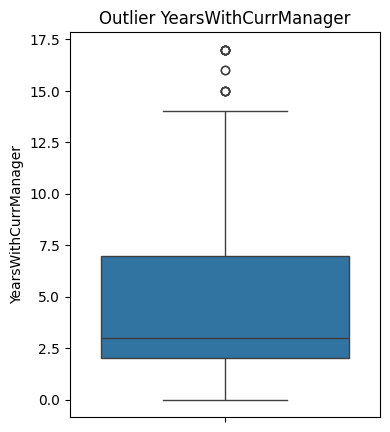

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df['YearsWithCurrManager'])
plt.title('Outlier YearsWithCurrManager')

### Data Distribution

Text(0.5, 1.0, 'Distribusi Age')

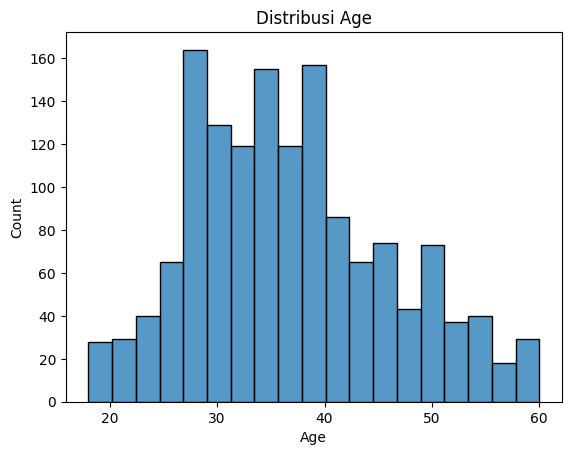

In [ ]:
sns.histplot(data=df, x='Age')
plt.title('Distribusi Age')

Text(0.5, 1.0, 'Distribusi DailyRate')

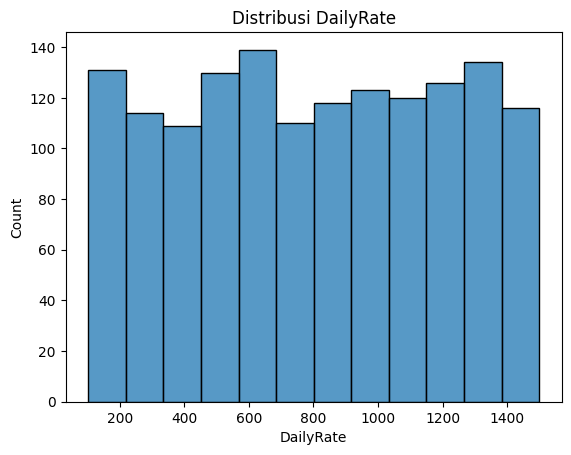

In [ ]:
sns.histplot(data=df, x='DailyRate')
plt.title('Distribusi DailyRate')

Text(0.5, 1.0, 'Distribusi DistanceFromHome')

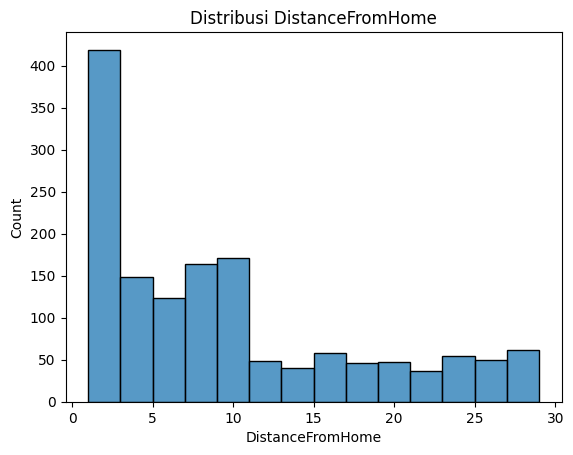

In [ ]:
sns.histplot(data=df, x='DistanceFromHome')
plt.title('Distribusi DistanceFromHome')

Text(0.5, 1.0, 'Distribusi Education')

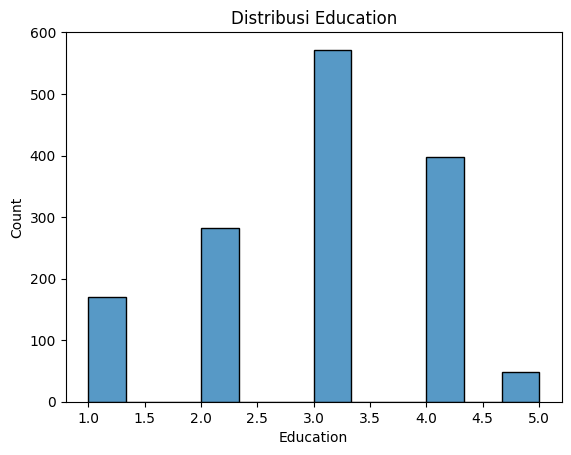

In [ ]:
sns.histplot(data=df, x='Education')
plt.title('Distribusi Education')

Text(0.5, 1.0, 'Distribusi EnvironmentSatisfaction')

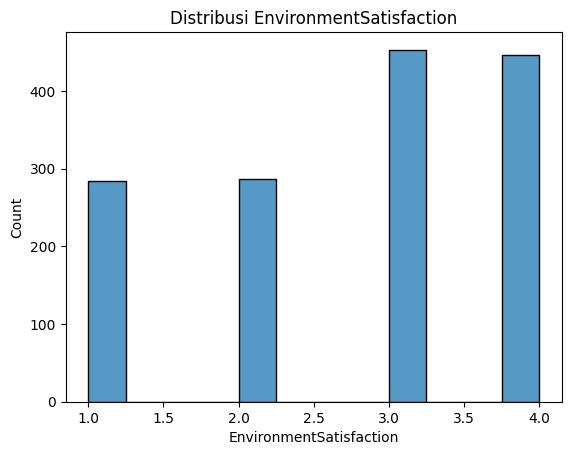

In [ ]:
sns.histplot(data=df, x='EnvironmentSatisfaction')
plt.title('Distribusi EnvironmentSatisfaction')

Text(0.5, 1.0, 'Distribusi HourlyRate')

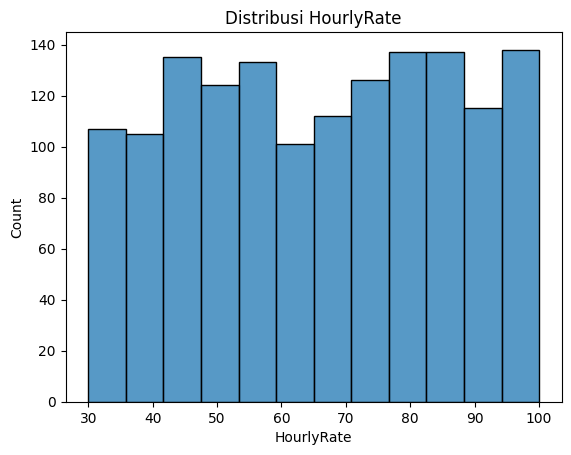

In [ ]:
sns.histplot(data=df, x='HourlyRate')
plt.title('Distribusi HourlyRate')

Text(0.5, 1.0, 'Distribusi JobInvolvement')

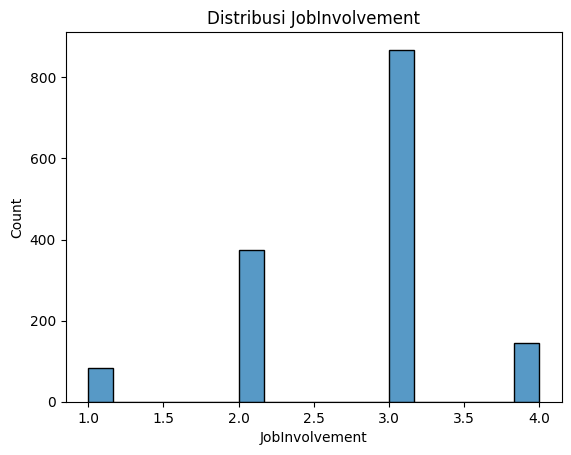

In [ ]:
sns.histplot(data=df, x='JobInvolvement')
plt.title('Distribusi JobInvolvement')

Text(0.5, 1.0, 'Distribusi JobLevel')

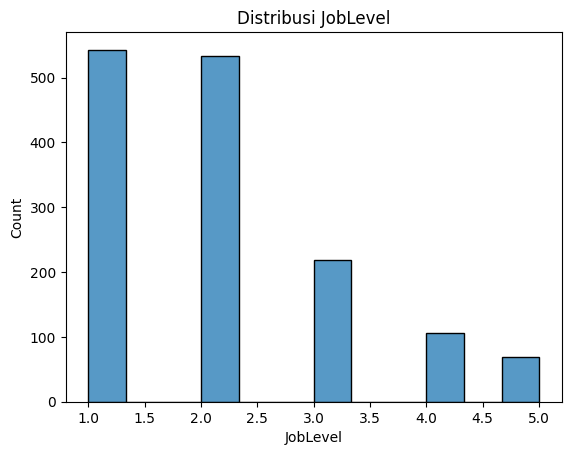

In [ ]:
sns.histplot(data=df, x='JobLevel')
plt.title('Distribusi JobLevel')

Text(0.5, 1.0, 'Distribusi JobSatisfaction')

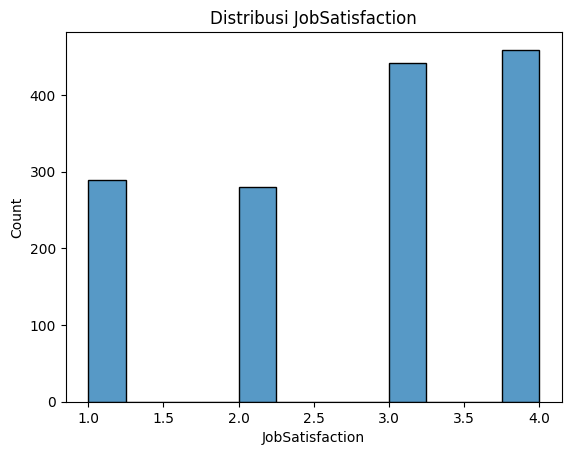

In [ ]:
sns.histplot(data=df, x='JobSatisfaction')
plt.title('Distribusi JobSatisfaction')

Text(0.5, 1.0, 'Distribusi MonthlyIncome')

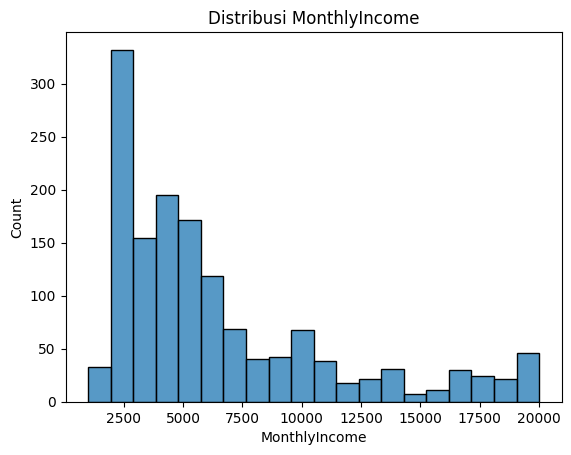

In [ ]:
sns.histplot(data=df, x='MonthlyIncome')
plt.title('Distribusi MonthlyIncome')

Text(0.5, 1.0, 'Distribusi MonthlyRate')

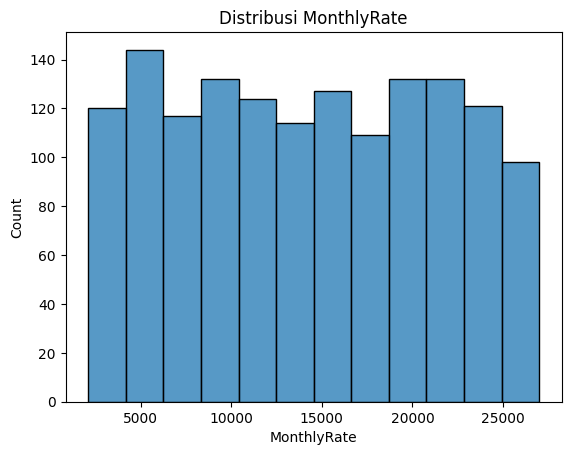

In [ ]:
sns.histplot(data=df, x='MonthlyRate')
plt.title('Distribusi MonthlyRate')

Text(0.5, 1.0, 'Distribusi NumCompaniesWorked')

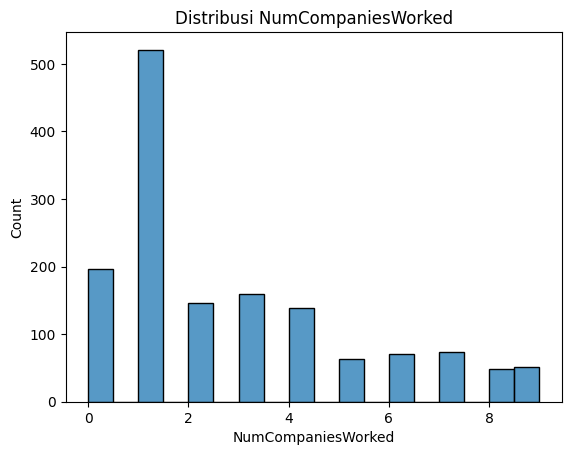

In [ ]:
sns.histplot(data=df, x='NumCompaniesWorked')
plt.title('Distribusi NumCompaniesWorked')

Text(0.5, 1.0, 'Distribusi PercentSalaryHike')

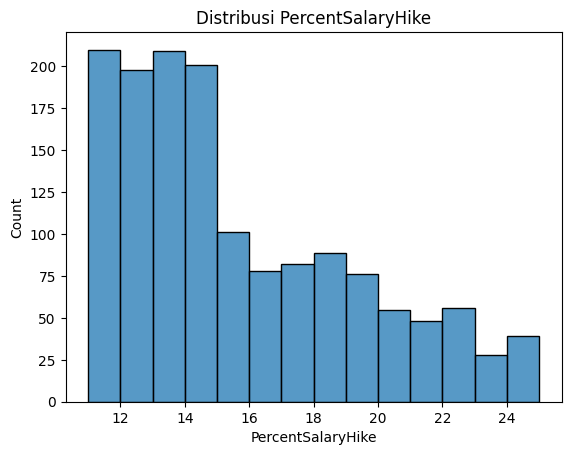

In [ ]:
sns.histplot(data=df, x='PercentSalaryHike')
plt.title('Distribusi PercentSalaryHike')

Text(0.5, 1.0, 'Distribusi PerformanceRating')

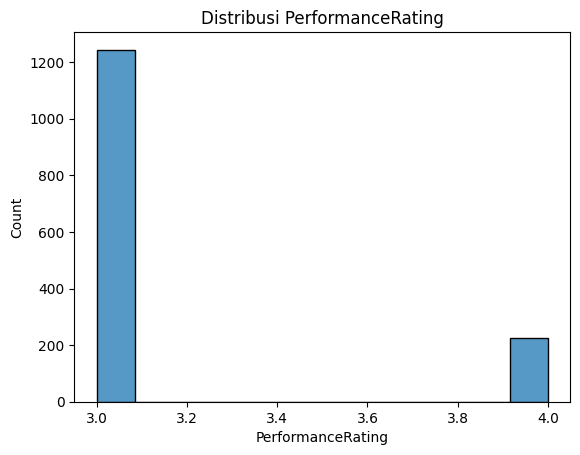

In [ ]:
sns.histplot(data=df, x='PerformanceRating')
plt.title('Distribusi PerformanceRating')

Text(0.5, 1.0, 'Distribusi RelationshipSatisfaction')

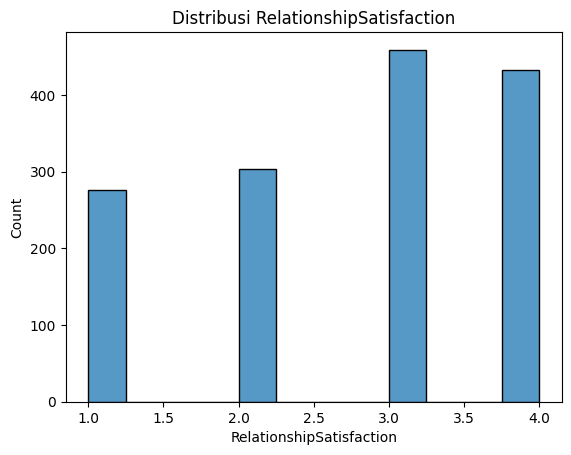

In [ ]:
sns.histplot(data=df, x='RelationshipSatisfaction')
plt.title('Distribusi RelationshipSatisfaction')

Text(0.5, 1.0, 'Distribusi StockOptionLevel')

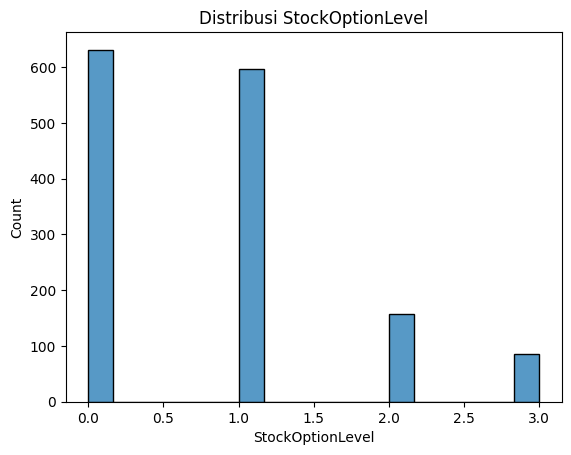

In [ ]:
sns.histplot(data=df, x='StockOptionLevel')
plt.title('Distribusi StockOptionLevel')

Text(0.5, 1.0, 'Distribusi TotalWorkingYears')

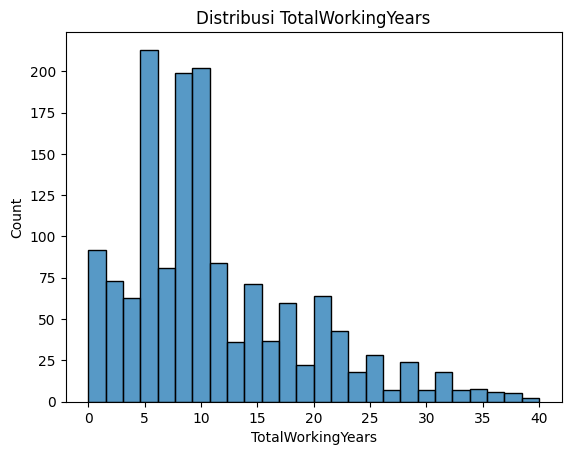

In [ ]:
sns.histplot(data=df, x='TotalWorkingYears')
plt.title('Distribusi TotalWorkingYears')

Text(0.5, 1.0, 'Distribusi TrainingTimesLastYear')

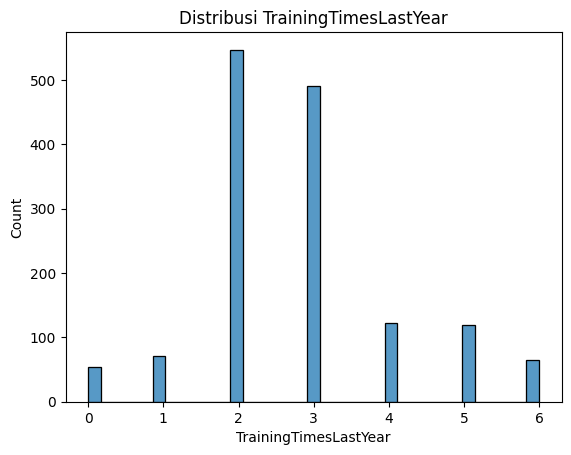

In [ ]:
sns.histplot(data=df, x='TrainingTimesLastYear')
plt.title('Distribusi TrainingTimesLastYear')

Text(0.5, 1.0, 'Distribusi WorkLifeBalance')

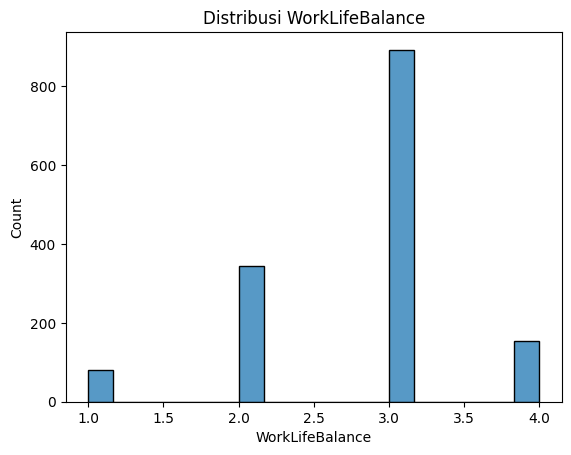

In [ ]:
sns.histplot(data=df, x='WorkLifeBalance')
plt.title('Distribusi WorkLifeBalance')

Text(0.5, 1.0, 'Distribusi YearsAtCompany')

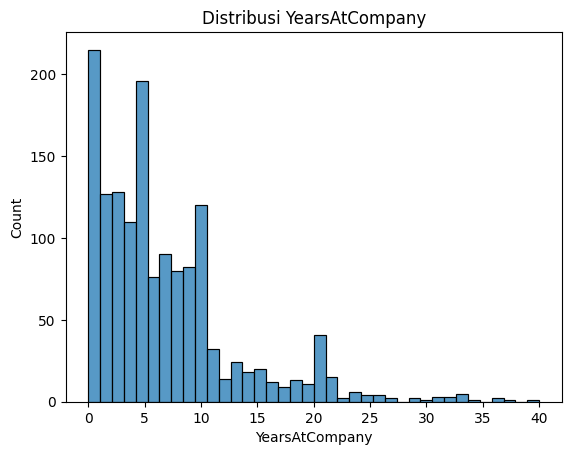

In [ ]:
sns.histplot(data=df, x='YearsAtCompany')
plt.title('Distribusi YearsAtCompany')

Text(0.5, 1.0, 'Distribusi YearsInCurrentRole')

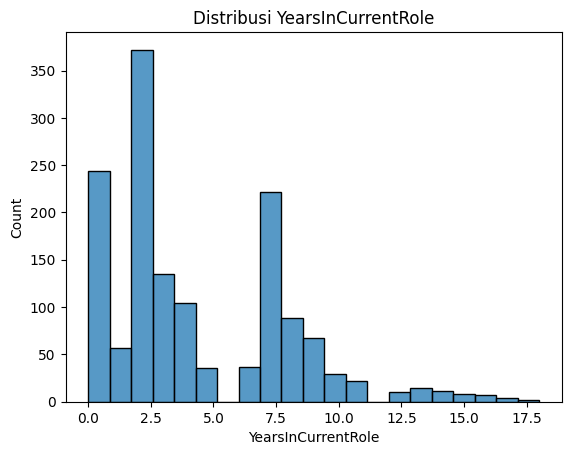

In [ ]:
sns.histplot(data=df, x='YearsInCurrentRole')
plt.title('Distribusi YearsInCurrentRole')

Text(0.5, 1.0, 'Distribusi YearsSinceLastPromotion')

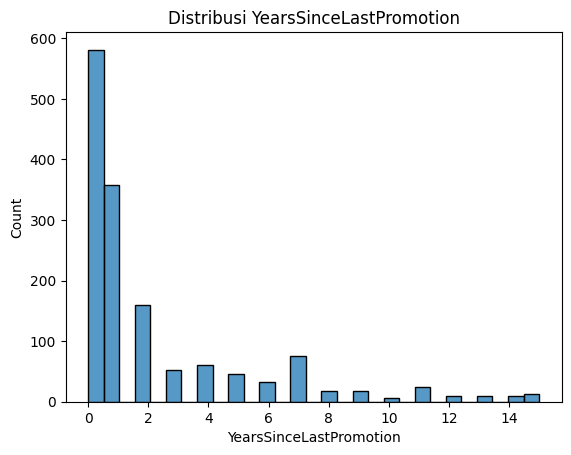

In [ ]:
sns.histplot(data=df, x='YearsSinceLastPromotion')
plt.title('Distribusi YearsSinceLastPromotion')

Text(0.5, 1.0, 'Distribusi YearsWithCurrManager')

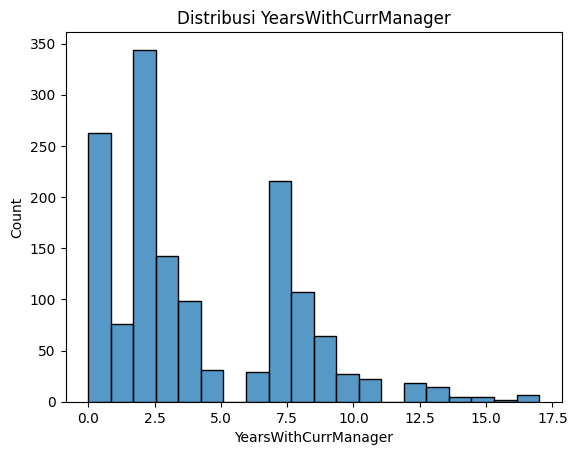

In [ ]:
sns.histplot(data=df, x='YearsWithCurrManager')
plt.title('Distribusi YearsWithCurrManager')

#### Compute Distribution

In [ ]:
# Fungsi untuk compute distribution
def compute_distribution(df, col):
    """
    Utility function to check data distribution for numerical features.

    mean >  median : Positive (Right) Skewed
    mean <  median : Negative (Left) Skewed
    mean == median : Normal

    skew in range (-0.5, 0.5) = approximately symmetrical (Normal distribution)
    skew in range (-1, 1) = moderately skewed
    skew > 1 or skew < -1 = highly skewed

    kurtosis > 3 : Leptokurtic
    kurtosis == 3: Mesokurtic
    kurtosis < 3: Platykurtic

    :param df: pandas dataframe
    :param col: selected numerical feature (string)
    :return: type of distribution (string)
    """
    mean = df[col].mean()
    median = df[col].median()

    skew_score = df[col].skew()
    kurtosis_score = df[col].kurtosis()

    if (skew_score > -0.5) and (skew_score < 0.5):
        skewness = 'Approximately Simetric (Normal Distribution)'
    elif(skew_score > -1) and (skew_score < 1):
        skewness = 'Moderately Skewed'
    else:
        skewness = 'Highly Skewed'

    if kurtosis_score > 3:
        kurtosis_flag = 'Leptokurtic'
    elif kurtosis_score == 3:
        kurtosis_flag = 'Mesokurtic'
    else:
        kurtosis_flag = 'Platykurtic'


    if mean < median:
        print(f'{col} data distribution: Left Skewed Distribution')
        print(f'Skewness Score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis Score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')

    elif mean > median:

        print(f'{col} data distribution: Right Skewed Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')

    else:

        print(f'{col} data distribution: Normal Distribution')
        print(f'Skewness score: {df[col].skew():.2f} [{skewness}]')
        print(f'Kurtosis score: {df[col].kurtosis():.2f} [{kurtosis_flag}]')

In [ ]:
for i in range(len(nums)):
    compute_distribution(df, nums[i])

Age data distribution: Right Skewed Distribution
Skewness score: 0.41 [Approximately Simetric (Normal Distribution)]
Kurtosis score: -0.40 [Platykurtic]
DailyRate data distribution: Right Skewed Distribution
Skewness score: -0.00 [Approximately Simetric (Normal Distribution)]
Kurtosis score: -1.20 [Platykurtic]
DistanceFromHome data distribution: Right Skewed Distribution
Skewness score: 0.96 [Moderately Skewed]
Kurtosis score: -0.22 [Platykurtic]
Education data distribution: Left Skewed Distribution
Skewness Score: -0.29 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -0.56 [Platykurtic]
EnvironmentSatisfaction data distribution: Left Skewed Distribution
Skewness Score: -0.32 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.20 [Platykurtic]
HourlyRate data distribution: Left Skewed Distribution
Skewness Score: -0.03 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.20 [Platykurtic]
JobInvolvement data distribution: Left Skewed Distributi

#### Outlier Handler

In [ ]:
# Fungsi untuk outlier handler
def outlier_handler(df, col):

    """
    Utility function to clean outlier using Tukey Fences Method.
    :param df: Dataframe with outlier (pd.DataFrame)
    :param col: Numerical Feature (String)
    :return: Dataframe without outlier (pd.DataFrame)
    """

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    up_bound = q3 + 1.5*iqr
    low_bound = q1 - 1.5*iqr

    outlier = df[col][(df[col] < low_bound) | (df[col] > up_bound)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%')

    no_outlier = df[(df[col] >= low_bound) & (df[col] <= up_bound)]

    return no_outlier

In [ ]:
df_clean = df.copy()

for i in range(len(nums)):
    print(f'Handling {nums[i]}')
    df_clean = outlier_handler(df_clean, nums[i])

Handling Age
Percentage of outliers: 0.00%
Handling DailyRate
Percentage of outliers: 0.00%
Handling DistanceFromHome
Percentage of outliers: 0.00%
Handling Education
Percentage of outliers: 0.00%
Handling EnvironmentSatisfaction
Percentage of outliers: 0.00%
Handling HourlyRate
Percentage of outliers: 0.00%
Handling JobInvolvement
Percentage of outliers: 0.00%
Handling JobLevel
Percentage of outliers: 0.00%
Handling JobSatisfaction
Percentage of outliers: 0.00%
Handling MonthlyIncome
Percentage of outliers: 7.76%
Handling MonthlyRate
Percentage of outliers: 0.00%
Handling NumCompaniesWorked
Percentage of outliers: 3.47%
Handling PercentSalaryHike
Percentage of outliers: 0.00%
Handling PerformanceRating
Percentage of outliers: 15.89%
Handling RelationshipSatisfaction
Percentage of outliers: 0.00%
Handling StockOptionLevel
Percentage of outliers: 5.90%
Handling TotalWorkingYears
Percentage of outliers: 4.73%
Handling TrainingTimesLastYear
Percentage of outliers: 16.92%
Handling WorkLife

##### histogram (x=nama_kolom, y=count)

Text(0.5, 1.0, 'Age tanpa outlier')

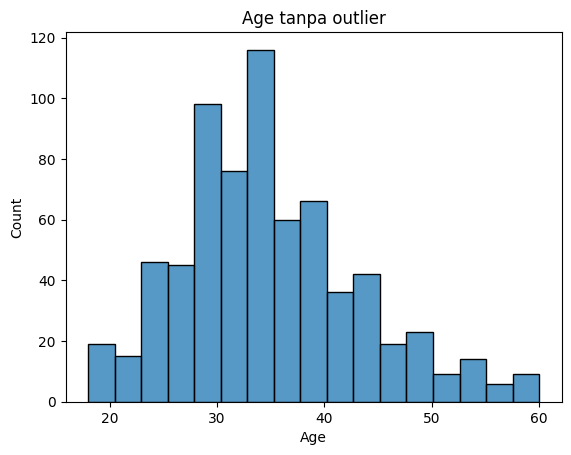

In [ ]:
sns.histplot(data=df_clean, x='Age')
plt.title('Age tanpa outlier')

Text(0.5, 1.0, 'DailyRate tanpa outlier')

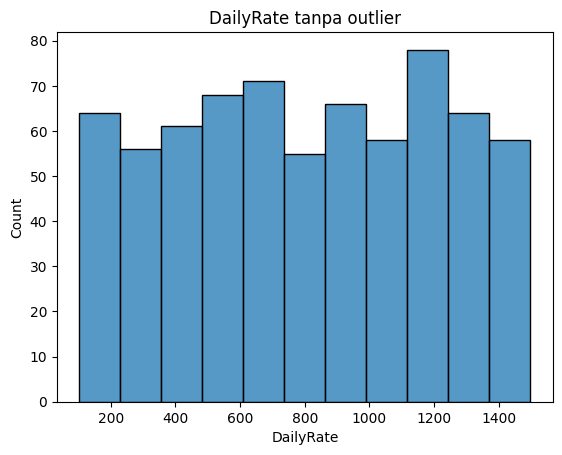

In [ ]:
sns.histplot(data=df_clean, x='DailyRate')
plt.title('DailyRate tanpa outlier')

Text(0.5, 1.0, 'DistanceFromHome tanpa outlier')

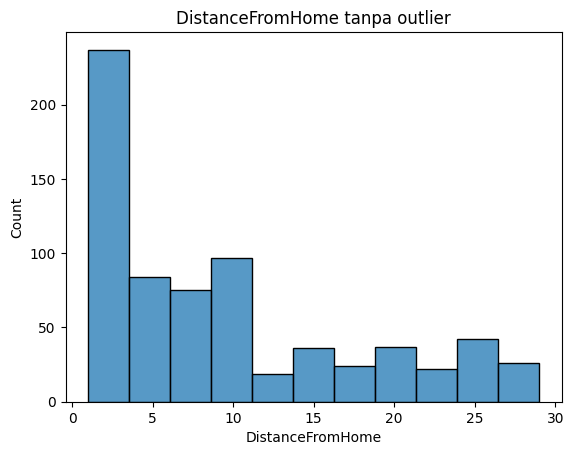

In [ ]:
sns.histplot(data=df_clean, x='DistanceFromHome')
plt.title('DistanceFromHome tanpa outlier')

Text(0.5, 1.0, 'Education tanpa outlier')

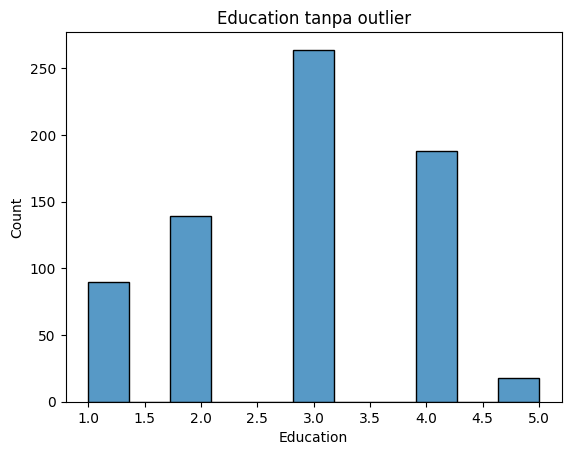

In [ ]:
sns.histplot(data=df_clean, x='Education')
plt.title('Education tanpa outlier')

Text(0.5, 1.0, 'EnvironmentSatisfaction tanpa outlier')

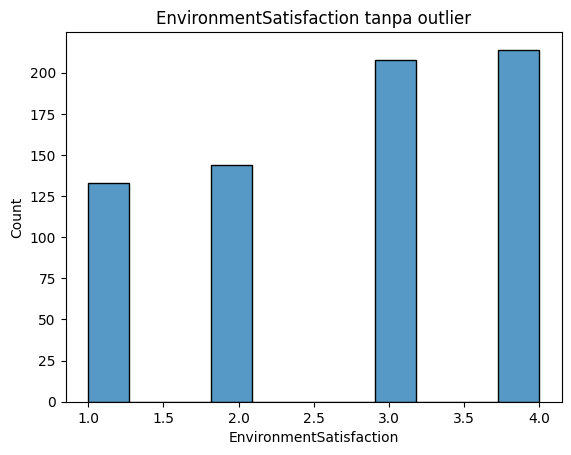

In [ ]:
sns.histplot(data=df_clean, x='EnvironmentSatisfaction')
plt.title('EnvironmentSatisfaction tanpa outlier')

Text(0.5, 1.0, 'HourlyRate tanpa outlier')

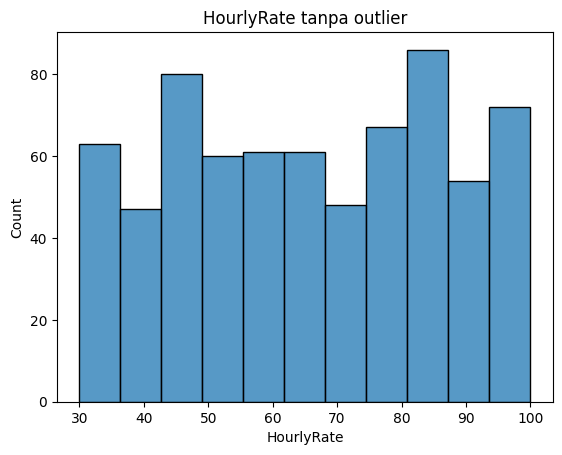

In [ ]:
sns.histplot(data=df_clean, x='HourlyRate')
plt.title('HourlyRate tanpa outlier')

Text(0.5, 1.0, 'JobInvolvement tanpa outlier')

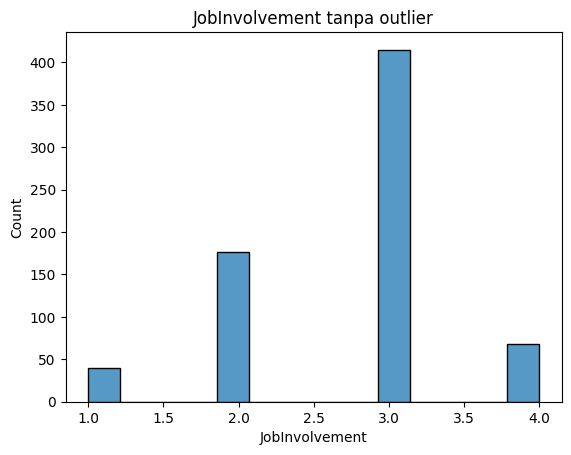

In [ ]:
sns.histplot(data=df_clean, x='JobInvolvement')
plt.title('JobInvolvement tanpa outlier')

Text(0.5, 1.0, 'JobLevel tanpa outlier')

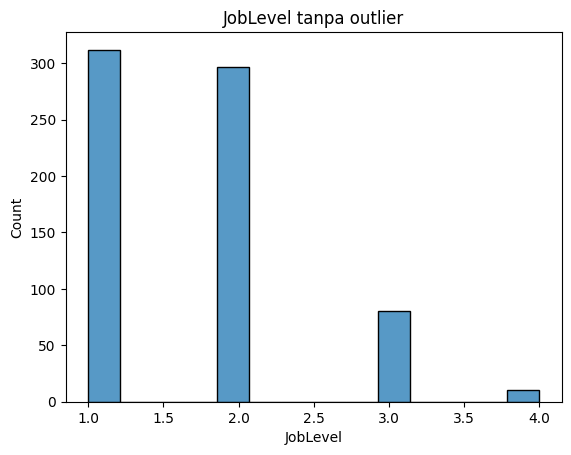

In [ ]:
sns.histplot(data=df_clean, x='JobLevel')
plt.title('JobLevel tanpa outlier')

Text(0.5, 1.0, 'JobSatisfaction tanpa outlier')

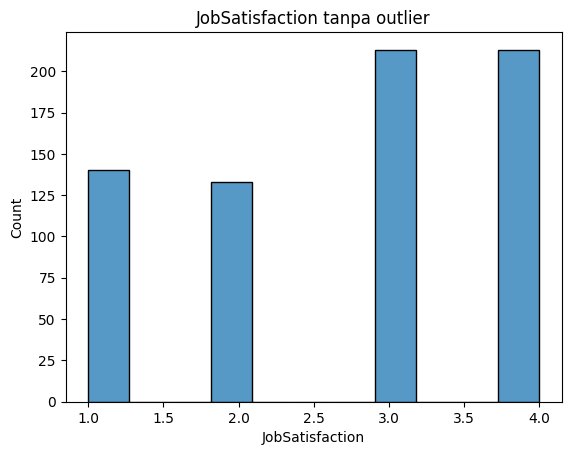

In [ ]:
sns.histplot(data=df_clean, x='JobSatisfaction')
plt.title('JobSatisfaction tanpa outlier')

Text(0.5, 1.0, 'MonthlyIncome tanpa outlier')

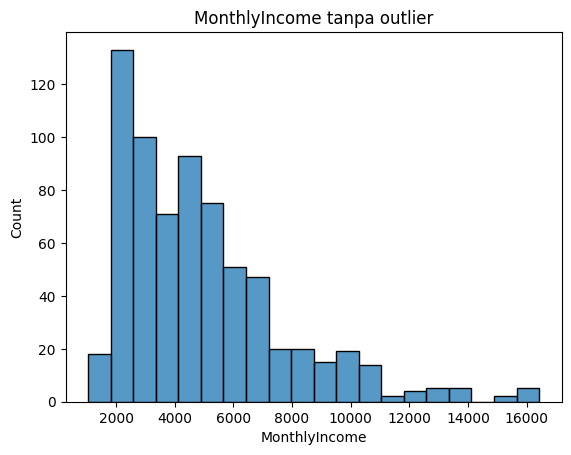

In [ ]:
sns.histplot(data=df_clean, x='MonthlyIncome')
plt.title('MonthlyIncome tanpa outlier')

Text(0.5, 1.0, 'MonthlyRate tanpa outlier')

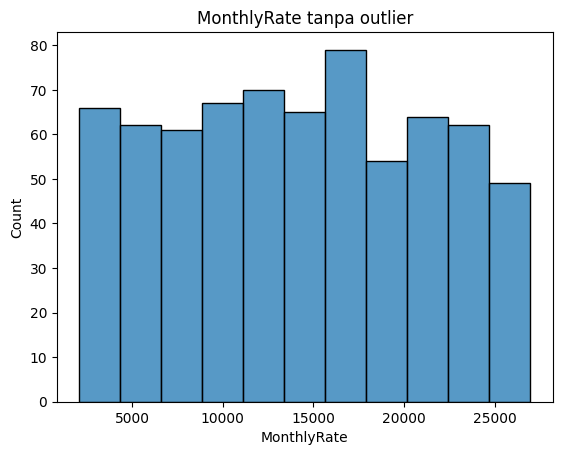

In [ ]:
sns.histplot(data=df_clean, x='MonthlyRate')
plt.title('MonthlyRate tanpa outlier')

Text(0.5, 1.0, 'NumCompaniesWorked tanpa outlier')

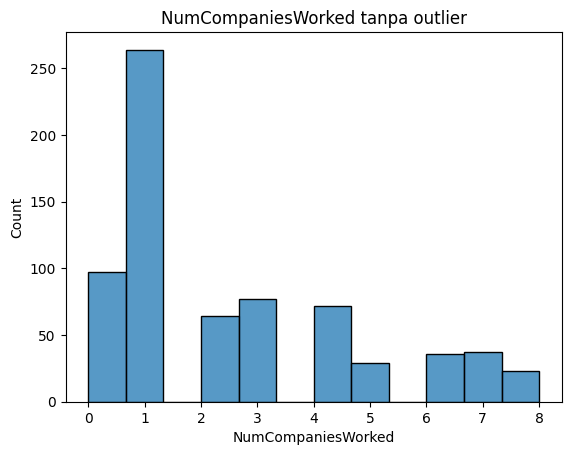

In [ ]:
sns.histplot(data=df_clean, x='NumCompaniesWorked')
plt.title('NumCompaniesWorked tanpa outlier')

Text(0.5, 1.0, 'PercentSalaryHike tanpa outlier')

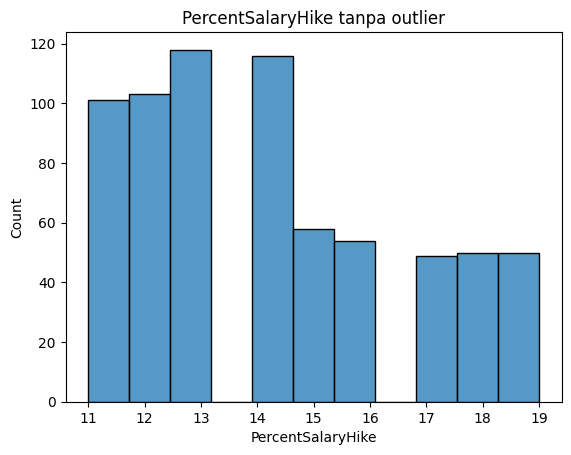

In [ ]:
sns.histplot(data=df_clean, x='PercentSalaryHike')
plt.title('PercentSalaryHike tanpa outlier')

Text(0.5, 1.0, 'PerformanceRating tanpa outlier')

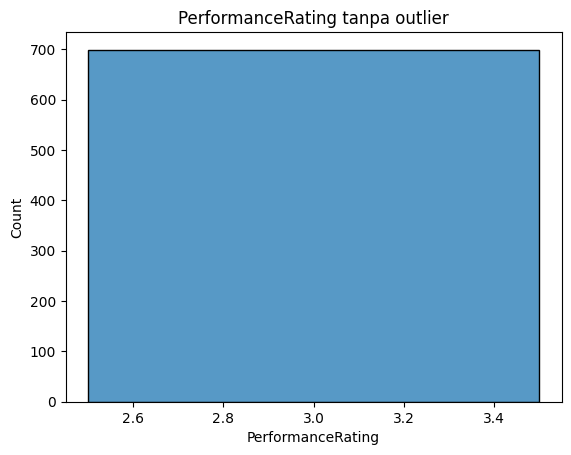

In [ ]:
sns.histplot(data=df_clean, x='PerformanceRating')
plt.title('PerformanceRating tanpa outlier')

Text(0.5, 1.0, 'RelationshipSatisfaction tanpa outlier')

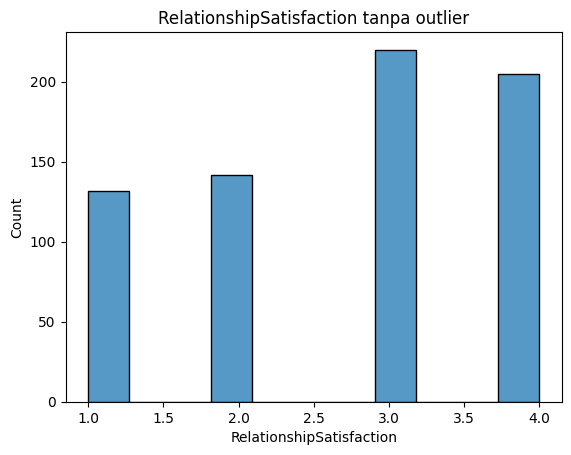

In [ ]:
sns.histplot(data=df_clean, x='RelationshipSatisfaction')
plt.title('RelationshipSatisfaction tanpa outlier')

Text(0.5, 1.0, 'StockOptionLevel tanpa outlier')

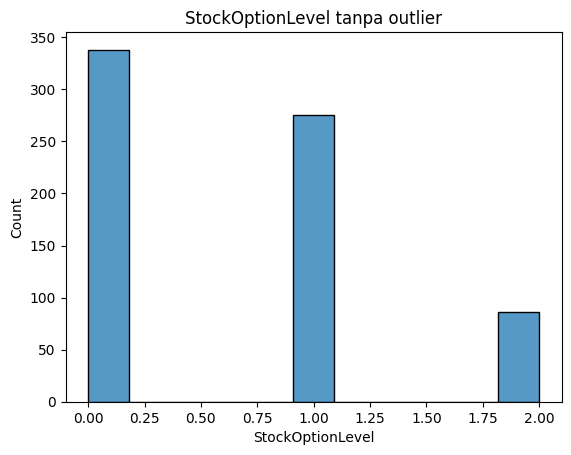

In [ ]:
sns.histplot(data=df_clean, x='StockOptionLevel')
plt.title('StockOptionLevel tanpa outlier')

Text(0.5, 1.0, 'TotalWorkingYears tanpa outlier')

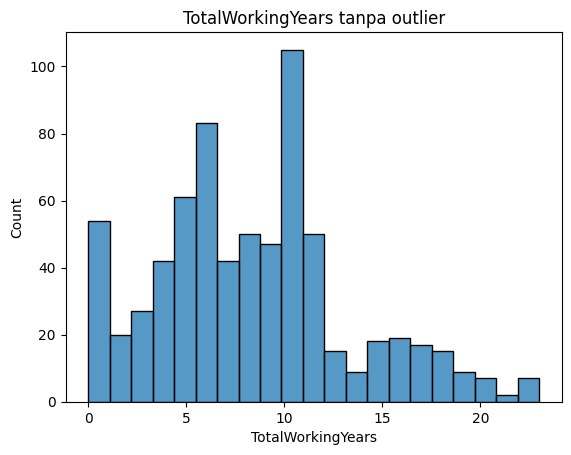

In [ ]:
sns.histplot(data=df_clean, x='TotalWorkingYears')
plt.title('TotalWorkingYears tanpa outlier')

Text(0.5, 1.0, 'TrainingTimesLastYear tanpa outlier')

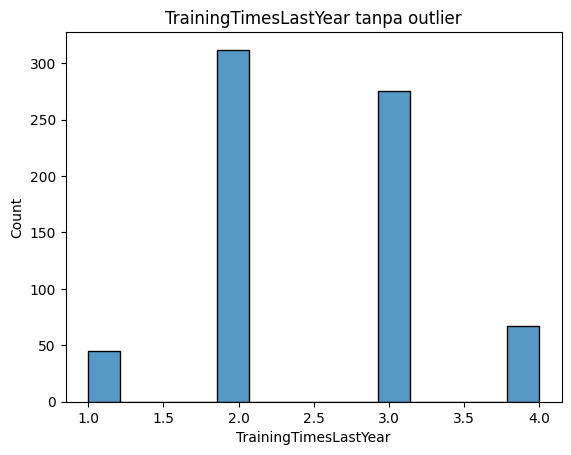

In [ ]:
sns.histplot(data=df_clean, x='TrainingTimesLastYear')
plt.title('TrainingTimesLastYear tanpa outlier')

Text(0.5, 1.0, 'WorkLifeBalance tanpa outlier')

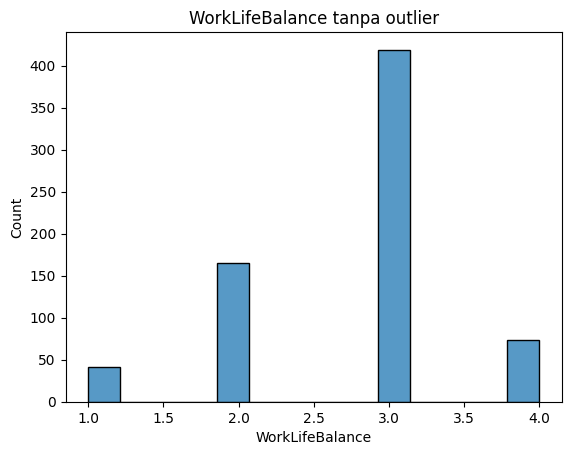

In [ ]:
sns.histplot(data=df_clean, x='WorkLifeBalance')
plt.title('WorkLifeBalance tanpa outlier')

Text(0.5, 1.0, 'YearsAtCompany tanpa outlier')

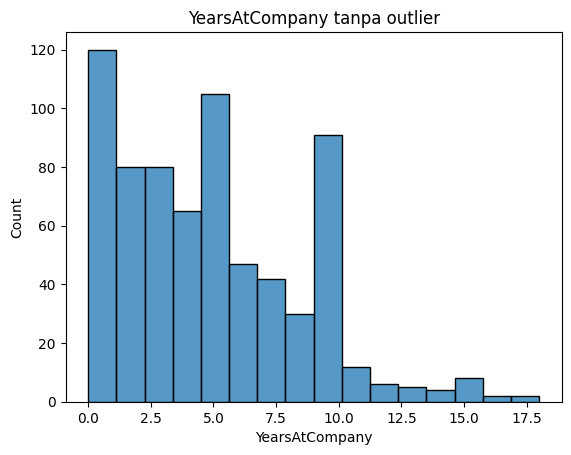

In [ ]:
sns.histplot(data=df_clean, x='YearsAtCompany')
plt.title('YearsAtCompany tanpa outlier')

Text(0.5, 1.0, 'YearsInCurrentRole tanpa outlier')

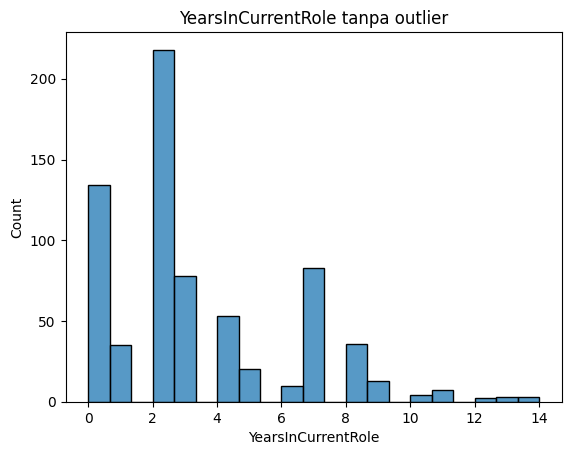

In [ ]:
sns.histplot(data=df_clean, x='YearsInCurrentRole')
plt.title('YearsInCurrentRole tanpa outlier')

Text(0.5, 1.0, 'YearsSinceLastPromotion tanpa outlier')

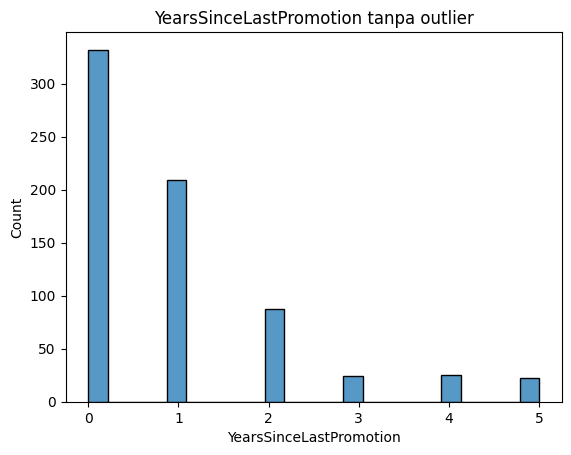

In [ ]:
sns.histplot(data=df_clean, x='YearsSinceLastPromotion')
plt.title('YearsSinceLastPromotion tanpa outlier')

Text(0.5, 1.0, 'YearsWithCurrManager tanpa outlier')

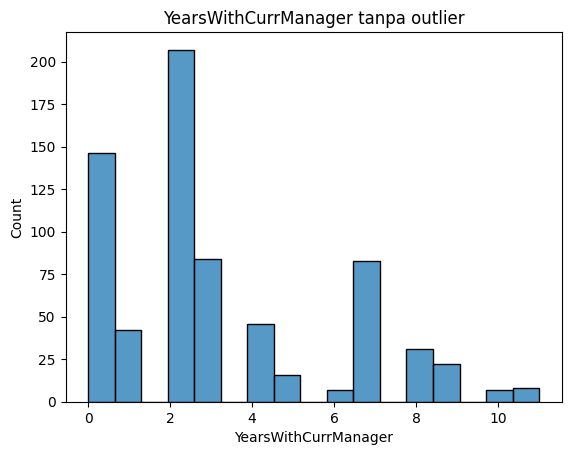

In [ ]:
sns.histplot(data=df_clean, x='YearsWithCurrManager')
plt.title('YearsWithCurrManager tanpa outlier')

##### Distribusi

In [ ]:
for i in range(len(nums)):
    compute_distribution(df_clean, nums[i])

Age data distribution: Right Skewed Distribution
Skewness score: 0.60 [Moderately Skewed]
Kurtosis score: 0.18 [Platykurtic]
DailyRate data distribution: Left Skewed Distribution
Skewness Score: -0.04 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.18 [Platykurtic]
DistanceFromHome data distribution: Right Skewed Distribution
Skewness score: 0.87 [Moderately Skewed]
Kurtosis score: -0.41 [Platykurtic]
Education data distribution: Left Skewed Distribution
Skewness Score: -0.29 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -0.67 [Platykurtic]
EnvironmentSatisfaction data distribution: Left Skewed Distribution
Skewness Score: -0.30 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.22 [Platykurtic]
HourlyRate data distribution: Left Skewed Distribution
Skewness Score: -0.04 [Approximately Simetric (Normal Distribution)]
Kurtosis Score: -1.22 [Platykurtic]
JobInvolvement data distribution: Left Skewed Distribution
Skewness Score: -0.52 [Mod

#### Boxplot After Outlier Handler

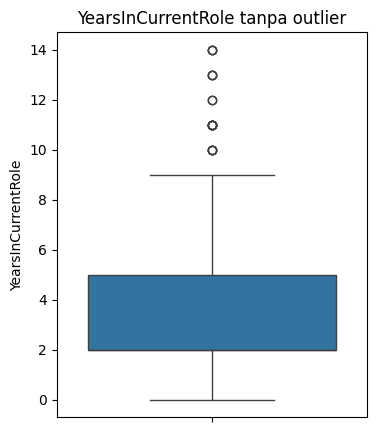

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df_clean['YearsInCurrentRole'])
plt.title('YearsInCurrentRole tanpa outlier')
plt.show()

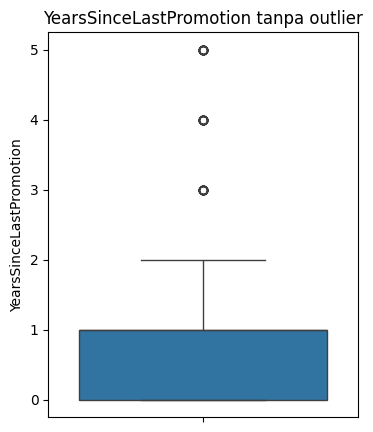

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df_clean['YearsSinceLastPromotion'])
plt.title('YearsSinceLastPromotion tanpa outlier')
plt.show()

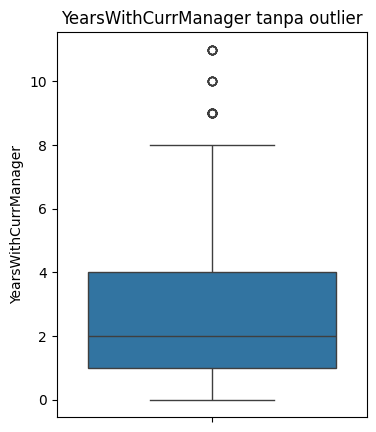

In [ ]:
plt.figure(figsize=(4,5))
sns.boxplot(y=df_clean['YearsWithCurrManager'])
plt.title('YearsWithCurrManager tanpa outlier')
plt.show()

#### Data Kategorikal

##### Attrition

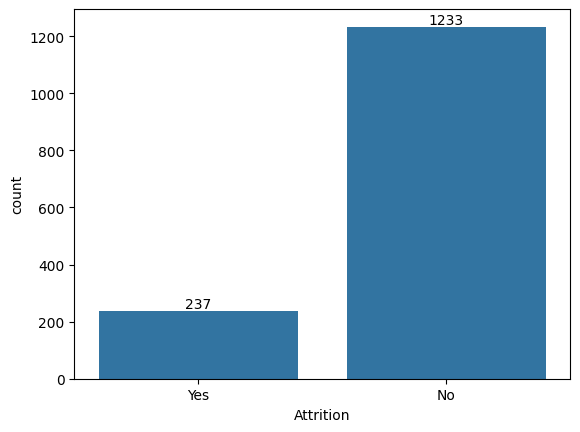

In [ ]:
ax = sns.countplot(data=df, x='Attrition')
for cont in ax.containers:
    ax.bar_label(cont)

##### BusinessTravel

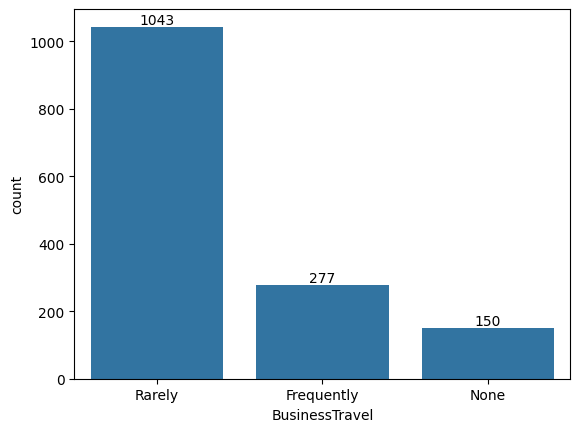

In [ ]:
ax = sns.countplot(data=df, x='BusinessTravel')
for cont in ax.containers:
    ax.bar_label(cont)

##### Department

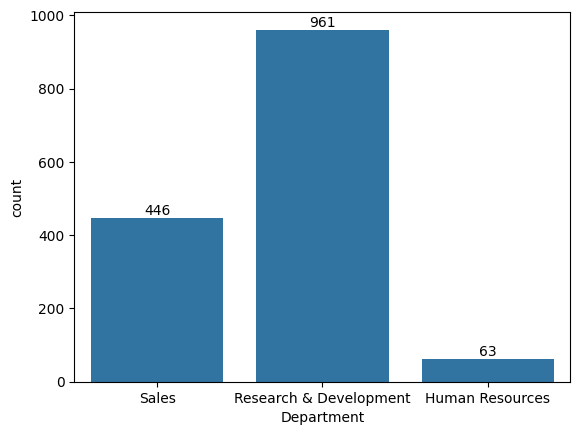

In [ ]:
ax = sns.countplot(data=df, x='Department')
for cont in ax.containers:
    ax.bar_label(cont)

##### EducationField

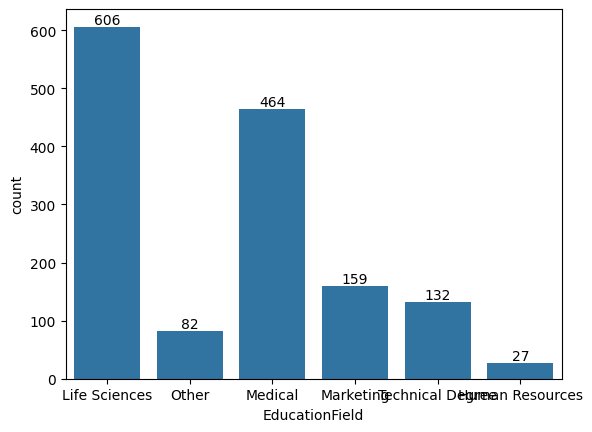

In [ ]:
ax = sns.countplot(data=df, x='EducationField')
for cont in ax.containers:
    ax.bar_label(cont)

##### Gender

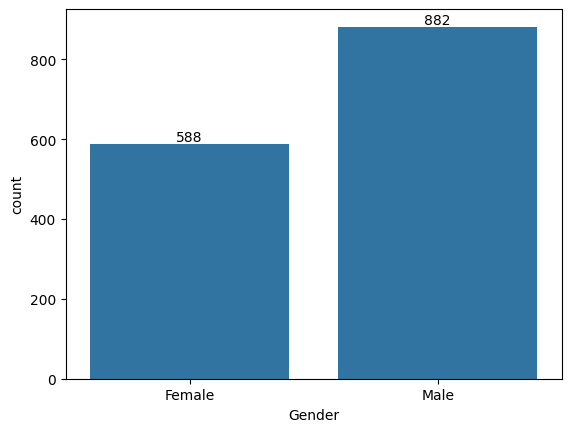

In [ ]:
ax = sns.countplot(data=df, x='Gender')
for cont in ax.containers:
    ax.bar_label(cont)

##### JobRole

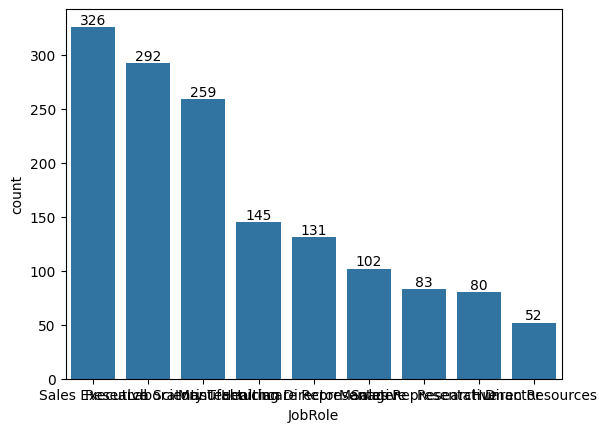

In [ ]:
ax = sns.countplot(data=df, x='JobRole')
for cont in ax.containers:
    ax.bar_label(cont)

##### MaritalStatus

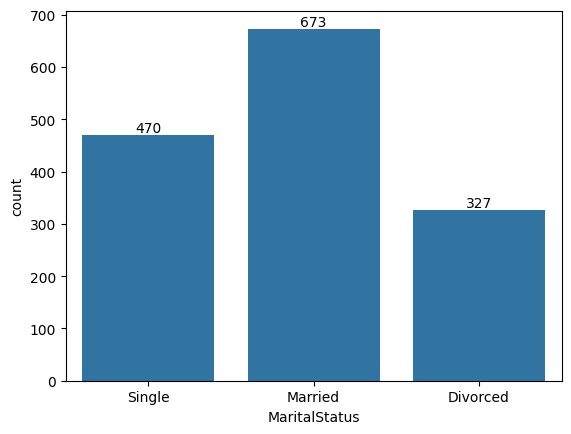

In [ ]:
ax = sns.countplot(data=df, x='MaritalStatus')
for cont in ax.containers:
    ax.bar_label(cont)

##### OverTime

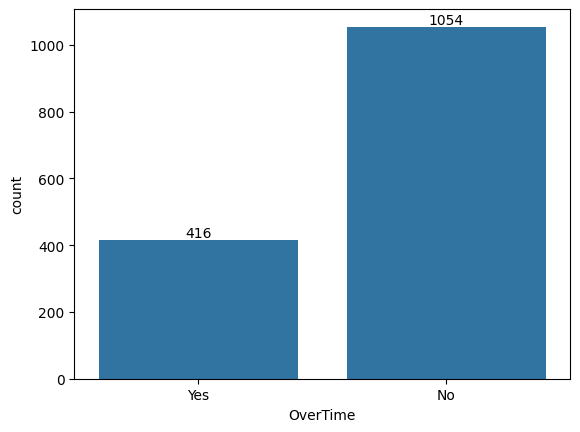

In [ ]:
ax = sns.countplot(data=df, x='OverTime')
for cont in ax.containers:
    ax.bar_label(cont)

## Multivariate Analysis

### Correlation Heatmap

In [ ]:
correlations = df_clean[nums].corr(method='pearson')
correlations = correlations.round(4)

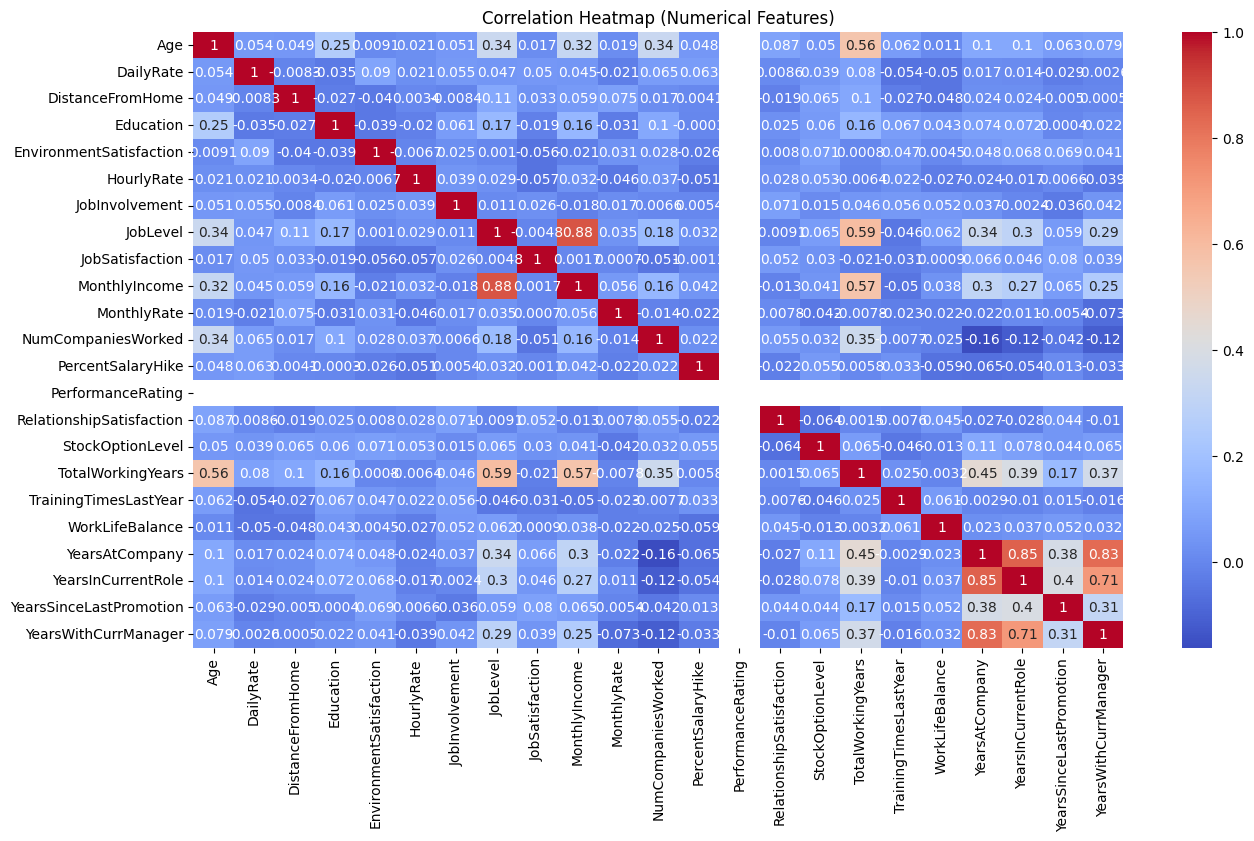

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

## Feature Engineering

In [ ]:
# Mengubah kolom 'Attrition' dari boolean menjadi int
df_clean['Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})

# Penghasilan per tahun ketika di perusahaan
df_clean['IncomePerYearAtCompany'] = df_clean['MonthlyIncome'] * 12 / df_clean['YearsAtCompany']
df_clean['IncomePerYearAtCompany'].replace([float('inf'), -float('inf')], 0, inplace=True)

df_clean.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerYearAtCompany
2,37,1,Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,0.000000
3,33,0,Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,4363.500000
5,32,0,Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,No,13,3,3,0,8,2,2,7,7,3,6,5259.428571
11,29,0,Rarely,153,Research & Development,15,2,Life Sciences,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Yes,12,3,4,0,10,3,3,9,5,0,8,5590.666667
12,31,0,Rarely,670,Research & Development,26,1,Life Sciences,1,Male,31,3,1,Research Scientist,3,Divorced,2911,15170,1,No,17,3,4,1,5,1,2,5,2,4,3,6986.400000


## Feature Selection

In [ ]:
# Mengambil kolom kategorikal
cats = df_clean.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding untuk nilai kategorikal
data_olah = pd.get_dummies(df_clean, columns=cats)

# Tampilkan data
data_olah.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerYearAtCompany,BusinessTravel_Frequently,BusinessTravel_None,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0.000000,False,False,True,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,4363.500000,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
5,32,0,1005,2,2,4,79,3,1,4,3068,11864,0,13,3,3,0,8,2,2,7,7,3,6,5259.428571,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False
11,29,0,153,15,2,4,49,2,2,3,4193,12682,0,12,3,4,0,10,3,3,9,5,0,8,5590.666667,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True
12,31,0,670,26,1,1,31,3,1,3,2911,15170,1,17,3,4,1,5,1,2,5,2,4,3,6986.400000,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False


## Feature Scaling

In [ ]:
# Import library untuk scaling data
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Fit dan transform data pada dataframe
scaled_data = scaler.fit_transform(data_olah)

# Membuat dataframe baru dengan data yang telah discaling
data_olah = pd.DataFrame(scaled_data, columns=data_olah.columns)

# Mengubah kolom 'Attrition' dari float menjadi int
data_olah['Attrition'] = data_olah['Attrition'].astype(int)

# Tampilkan data
data_olah.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerYearAtCompany,BusinessTravel_Frequently,BusinessTravel_None,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.249333,2,1.417611,-0.902656,-0.836379,1.171468,1.274549,-1.028080,-0.960599,0.259654,-1.019992,-1.691855,1.593297,0.329465,0.0,-0.658910,-0.926294,-0.282680,0.634775,0.344783,-1.435344,-1.125042,-0.761730,-1.111743,-0.873984,-0.48475,-0.328276,0.635307,-0.215423,0.771939,-0.700289,-0.142961,-0.839570,-0.379508,-0.613176,3.858285,-0.341487,-0.767226,0.767226,-0.303624,-0.215423,2.034627,-0.08488,-0.322902,-0.148087,-0.542627,-0.564684,-0.303624,-0.489246,-0.887538,1.315473,-1.563122,1.563122
1,-0.224586,0,1.465259,-0.780141,1.099478,1.171468,-0.486336,0.378237,-0.960599,0.259654,-0.723701,1.286882,-0.653001,-1.306742,0.0,0.265946,-0.926294,-0.075776,0.634775,0.344783,0.868457,1.284074,1.640296,-1.111743,-0.654516,2.06292,-0.328276,-1.574043,-0.215423,0.771939,-0.700289,-0.142961,1.191086,-0.379508,-0.613176,-0.259183,-0.341487,1.303396,-1.303396,-0.303624,-0.215423,-0.491491,-0.08488,-0.322902,-0.148087,1.842885,-0.564684,-0.303624,-0.489246,1.126712,-0.760183,-1.563122,1.563122
2,-0.343066,0,0.494759,-0.902656,-0.836379,1.171468,0.638674,0.378237,-0.960599,1.167145,-0.666179,-0.333541,-1.102261,-0.488638,0.0,0.265946,-0.926294,-0.075776,-0.689726,-1.048300,0.580482,1.284074,1.640296,1.008607,-0.609455,2.06292,-0.328276,-1.574043,-0.215423,0.771939,-0.700289,-0.142961,1.191086,-0.379508,-0.613176,-0.259183,-0.341487,-0.767226,0.767226,-0.303624,-0.215423,2.034627,-0.08488,-0.322902,-0.148087,-0.542627,-0.564684,-0.303624,-0.489246,-0.887538,1.315473,0.639745,-0.639745
3,-0.698505,0,-1.641845,0.690050,-0.836379,1.171468,-0.828730,-1.028080,0.418166,0.259654,-0.259185,-0.216187,-1.102261,-0.897690,0.0,1.190801,-0.926294,0.338032,0.634775,0.344783,1.156432,0.595755,-0.761730,1.715391,-0.592795,-0.48475,-0.328276,0.635307,-0.215423,0.771939,-0.700289,-0.142961,1.191086,-0.379508,-0.613176,-0.259183,-0.341487,1.303396,-1.303396,-0.303624,-0.215423,2.034627,-0.08488,-0.322902,-0.148087,-0.542627,-0.564684,-0.303624,-0.489246,-0.887538,1.315473,-1.563122,1.563122
4,-0.461546,0,-0.345338,2.037725,-1.804308,-1.573301,-1.709172,0.378237,-0.960599,0.259654,-0.722977,0.140750,-0.653001,1.147569,0.0,1.190801,0.522206,-0.696488,-2.014226,-1.048300,0.004532,-0.436723,2.440971,-0.051568,-0.522594,-0.48475,-0.328276,0.635307,-0.215423,0.771939,-0.700289,-0.142961,1.191086,-0.379508,-0.613176,-0.259183,-0.341487,-0.767226,0.767226,-0.303624,-0.215423,-0.491491,-0.08488,-0.322902,-0.148087,1.842885,-0.564684,-0.303624,2.043961,-0.887538,-0.760183,0.639745,-0.639745


## Handling Imbalanced Data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

X = data_olah.drop('Attrition', axis=1)
y = data_olah['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Pada variabel X kolom 'Attrition' didrop karena merupakan target machine learning

In [ ]:
# Handling imbalance data training
from imblearn.over_sampling import SMOTE

# Check class distribution
print(y_train.value_counts())

# Imbalance data train menggunakan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print(pd.Series(y_res).value_counts())

Attrition
0    399
2     90
Name: count, dtype: int64
Attrition
0    399
2    399
Name: count, dtype: int64


SMOTE (Synthetic Minority Over-sampling Technique) kami gunakan untuk handling data imbalance karena SMOTE membuat sampel sintetis dari kelas minoritas  dengan cara interpolasi data yang ada, bukan hanya menduplikat. Karena Metode ini juga dapat mengurangi risiko overfitting.

#Modeling


##Logistic Regression

Logistic Regression dipilih karena merupakan model baseline untuk klasifikasi biner, mudah di interpretasikan dan cepat dilatih, tetapi performa bisa buruk pada data yang sangat tidak seimbang tanpa adanya teknik balancing

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report, accuracy_score, precision_score
# from sklearn.preprocessing import StandardScaler

# # Inisialisasi dan training Logistic Regression
# model = LogisticRegression(random_state=42)
# model.fit(X_res, y_res)

# # Prediksi
# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)[:, 1]

# # Evaluasi
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_proba)
# accuracy = model.score(X_test, y_test)
# precision = precision_score(y_test, y_pred)

# # Tampilkan hasil
# print("Recall:", recall)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("F1 Score:", f1)
# print("ROC AUC Score:", roc_auc)
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

Recall = 0.63
Artinya: model berhasil menangkap sekitar 63% dari mereka. Ini cukup baik untuk kasus imbalanced data, karena recall adalah metrik penting dalam mendeteksi kasus attrition.

Precision = 0.36
Artinya: Dari semua yang diprediksi sebagai attrition, hanya 36% yang benar-benar attrition. Ini menunjukkan masih cukup banyak false positive.

F1-Score = 0.45
model belum optimal dalam menyeimbangkan keduanya.

Roc Auc = 0.77
model sudah cukup baik dalam memisahkan antara dua kelas

dari hasil tersebut kami mencoba untuk hyperparameter tuning

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV, cross_val_predict
# from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, accuracy_score, classification_report

# # Parameter grid untuk tuning
# param_grid = {
#     'penalty': ['l2', 'l1'],
#     'C': [0.01, 0.1, 1, 10],
#     'solver': ['liblinear'],
#     'max_iter': [100, 200]
# }

# # Inisialisasi model
# logreg = LogisticRegression(random_state=42)

# # GridSearchCV dengan 5-fold cross-validation dan scoring berdasarkan recall
# grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='recall', n_jobs=-1)
# grid_search.fit(X_res, y_res)

# # Model terbaik dari hasil tuning
# best_model = grid_search.best_estimator_

# # Cross-validated prediction di test set
# y_predtun = best_model.predict(X_test)
# y_probatun = best_model.predict_proba(X_test)[:, 1]

# # Evaluasi hasil
# recall = recall_score(y_test, y_predtun)
# accuracy = accuracy_score(y_test, y_predtun)
# precision = precision_score(y_test, y_predtun)
# f1 = f1_score(y_test, y_predtun)
# roc_auc = roc_auc_score(y_test, y_probatun)

# # Tampilkan hasil
# print("Best Parameters:", grid_search.best_params_)
# print("Recall:", recall)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("F1 Score:", f1)
# print("ROC AUC Score:", roc_auc)
# print("\nClassification Report:\n", classification_report(y_test, y_predtun))

Setelah melakukan hyperparameter tuning menunjukkan bahwa nilai recall bertambah hal tersebut juga terjadi di F1 Score dan ROC_AUC yang artinya hyperparameter tuning mampu untuk meningkatkan performa model logistic regression

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# # Confusion Matrix
# label = ["No Attrition", "Attrition"]
# cm = confusion_matrix(y_test, y_predtun)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label)
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix")
# plt.grid(False)
# plt.show()

Dari confusion matrix diatas dengan nilai recall sebesar 69% hal ini dapat digunakan untuk mendeteksi sebagian besar karyawan yang akan keluar, dapat digunakan oleh tim HR untuk melakukan perencanaan rekruitmen berdasarkan prediksi attrition. Sebanyak 40 karyawan yang sebenarnya lolal salah dikira akan resiko hal ini bisa mengganggu hubungan kerja jika prediksi disalahgunakan. 10 karyawan dianggap attrition ini bisa berdampak pada kehilangan SDM penting secara mendadak

Insight bisnis yang bisa didapatkan yaitu:



*   Investigasi lebih lanjut terhadap beban kerja, gaji, dan career path posisi Research Scientist
*   Lebih Meninjau untuk kebijakan lembur
*   Lebih bisa meningkatkan lagi program retensi jangka panjang
*   survey berkala dan tindak lanjut untuk tim dengan satisfaction rendah





Nilai absolut tertinggi jobrole research scientist ini sangat memengaruhi prediksi attrition. Posisi Research Scientist rentan terhadap attrition hal tersebut perlu perhatian lebih dari HR.

In [ ]:
# #Analisis Fairness pada feature JobRole

# X_test_JobRole = df.loc[X_test.index, 'JobRole']

# # Buat ulang df_eval dengan JobRole asli
# df_eval = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'Prob': y_proba,
#     'JobRole': X_test_JobRole.values
# })

# for JobRole in df_eval['JobRole'].unique():
#     subset = df_eval[df_eval['JobRole'] == JobRole]

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score
# import matplotlib.pyplot as plt
# import pandas as pd

# # Siapkan list metrik
# metrics = {'precision': [], 'recall': [], 'f1': []}
# groups = df_eval['JobRole'].unique()

# # Loop per grup
# for JobRole in groups:
#     subset = df_eval[df_eval['JobRole'] == JobRole]
#     y_true = subset['Actual']
#     y_pred_group = subset['Predicted']

#     metrics['precision'].append(precision_score(y_true, y_pred_group))
#     metrics['recall'].append(recall_score(y_true, y_pred_group))
#     metrics['f1'].append(f1_score(y_true, y_pred_group))

# # Buat DataFrame hasil
# df_metrics = pd.DataFrame(metrics, index=groups)
# # Barplot untuk masing-masing metrik
# ax = df_metrics.plot(kind='bar', figsize=(20, 6))
# plt.title('Fairness Evaluation per JobRole')
# plt.ylabel('Score')
# plt.ylim(0, 1)
# plt.xticks(rotation=0)
# plt.legend(title='Metrik')
# plt.grid(axis='y')

# # Tambahkan angka di atas setiap bar
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# plt.tight_layout()
# plt.show()

*   Dari fairness evaluation didapatkan bahwa terdapat bias di Human Resource, yang artinya model gagal mengenali karyawan HR yang attrition
*   Recall tinggi dan precision rendah pada kelompok Healthcare Representative, Research Director, Manufacturing Director, Sales Representative, yang artinya model over sensitif terhadap kelompok ini yang mana bisa menciptakan alarm palasu dalam kebijakan SDM

In [ ]:
# import shap

# explainer = shap.LinearExplainer(best_model, X_test, feature_perturbation="interventional")
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test)



*  Pada feature StockOptionLevel Nilai rendah (biru) cenderung meningkatkan risiko attrition. Karyawan tanpa opsi saham cenderung lebih mudah keluar hal ini bisa untuk mempertimbangkan stock option sebagai strategi retensi.
*   YearsInCurrentRole Nilai rendah (biru) cenderung meningkatkan risiko attrition. Karyawan yang baru dipindah ke posisi baru cenderung belum settle. Program onboarding dan mentoring bisa membantu retensi.

*   MonthlyIncome Nilai rendah (biru) cenderung meningkatkan risiko attrition. Perlu audit kompensasi, terutama bagi karyawan dengan gaji rendah





##XGBoost

Model ini kami pilih menjadi model ke 2 karena XGBoost cocok untuk menangani dataset yang kompleks memiliki performa tinggi tetapi setelah dilakukan tuning model mengalami penurunan

In [ ]:
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# # Inisialisasi model XGBoost
# xgb_model = XGBClassifier(scale_pos_weight=4.84, random_state=42, use_label_encoder=False, eval_metric='logloss')

# # Melatih model menggunakan data hasil SMOTE
# xgb_model.fit(X_res, y_res)

# # Prediksi terhadap data test
# y_pred = xgb_model.predict(X_test)

# # Evaluasi model
# from sklearn.metrics import recall_score, f1_score, roc_auc_score, classification_report
# print("Recall:", recall_score(y_test, y_pred))
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Precision:", precision_score(y_test, y_pred))
# print("F1 Score:", f1_score(y_test, y_pred))
# print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
# print("Classification Report:\n", classification_report(y_test, y_pred))

Recall = 0.43
Artinya: model berhasil menangkap sekitar 43% dari mereka. Ini kurang baik untuk kasus imbalanced data, karena recall adalah metrik penting dalam mendeteksi kasus attrition.

Precision = 0.5
Artinya: Dari semua yang diprediksi sebagai attrition, hanya 50% yang benar-benar attrition. Ini menunjukkan masih cukup banyak false positive.

F1-Score = 0.47
model belum optimal dalam menyeimbangkan keduanya.

Roc Auc = 0.77
model sudah cukup baik dalam memisahkan antara dua kelas

dari hasil tersebut kami mencoba untuk hyperparameter tuning

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from scipy.stats import randint, uniform
# from xgboost import XGBClassifier
# from collections import Counter

# # Hitung rasio jumlah kelas
# counter = Counter(y_res)
# neg = counter[0]
# pos = counter[1]
# scale_pos = neg / pos

# # Inisialisasi ulang model dengan parameter penting
# xgb = XGBClassifier(
#     scale_pos_weight=scale_pos,
#     use_label_encoder=False,
#     eval_metric='logloss',
#     random_state=42
# )

# # Hyperparameter space
# param_dist = {
#     'n_estimators': randint(100, 300),
#     'max_depth': randint(3, 10),
#     'learning_rate': uniform(0.01, 0.3),
#     'subsample': uniform(0.7, 0.3),
#     'colsample_bytree': uniform(0.7, 0.3),
#     'min_child_weight': randint(1, 10)
# }

# # Cross-validation strategy
# cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

# # RandomizedSearchCV setup
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     scoring='f1',
#     n_iter=30,
#     cv=cv,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit random search
# random_search.fit(X_res, y_res)

# # Best model & parameter
# best_xgb = random_search.best_estimator_
# print("Best Parameters:", random_search.best_params_)

In [ ]:
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
#     classification_report, confusion_matrix, ConfusionMatrixDisplay
# )
# import matplotlib.pyplot as plt

# # Prediksi probabilitas
# y_proba = best_xgb.predict_proba(X_test)[:, 1]

# # Prediksi dengan threshold
# threshold = 0.05
# y_pred_thresh = (y_proba >= threshold).astype(int)

# # Evaluasi metrik
# accuracy = accuracy_score(y_test, y_pred_thresh)
# precision = precision_score(y_test, y_pred_thresh)
# recall = recall_score(y_test, y_pred_thresh)
# f1 = f1_score(y_test, y_pred_thresh)
# roc_auc = roc_auc_score(y_test, y_proba)

# # Tampilkan hasil
# print("=== Evaluasi Model XGBoost (RandomizedSearchCV) ===")
# print(f"Accuracy         : {accuracy:.4f}")
# print(f"Recall           : {recall:.4f}")
# print(f"Precision        : {precision:.4f}")
# print(f"F1 Score         : {f1:.4f}")
# print(f"ROC AUC Score    : {roc_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh, target_names=["No Attrition", "Attrition"]))

# # Visualisasi Confusion Matrix
# cm = confusion_matrix(y_test, y_pred_thresh)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
# disp.plot(cmap=plt.cm.Blues)
# plt.title("Confusion Matrix - Best XGBoost")
# plt.grid(False)
# plt.show()

setelah dilakukan hyperparameter tuning ternyata model mengalami overfitting, hal tersebut dapat dilihat dari nilai recall dan precisionnya yang memiliki selisih cukup jauh

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import precision_score, recall_score, f1_score
# import pandas as pd
# import matplotlib.pyplot as plt

# #Ambil kembali kolom sensitif: JobRole
# X_test_JobRole = df.loc[X_test.index, 'JobRole']

# # Buat DataFrame Evaluasi
# df_eval = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'Prob': y_proba,
#     'JobRole': X_test_JobRole.values
# })

# # Siapkan struktur metrik
# metrics = {'precision': [], 'recall': [], 'f1': []}
# groups = df_eval['JobRole'].unique()

# # Looping per JobRole
# for role in groups:
#     subset = df_eval[df_eval['JobRole'] == role]
#     y_true = subset['Actual']
#     y_pred_group = subset['Predicted']

#     metrics['precision'].append(precision_score(y_true, y_pred_group, zero_division=0))
#     metrics['recall'].append(recall_score(y_true, y_pred_group, zero_division=0))
#     metrics['f1'].append(f1_score(y_true, y_pred_group, zero_division=0))

# # Buat DataFrame Hasil
# df_metrics = pd.DataFrame(metrics, index=groups)

# #Visualisasi Barplot
# ax = df_metrics.plot(kind='bar', figsize=(20, 6))
# plt.title('Fairness Evaluation per JobRole (XGBoost)')
# plt.ylabel('Score')
# plt.ylim(0, 1)
# plt.xticks(rotation=30)
# plt.legend(title='Metric')
# plt.grid(axis='y')

# # Tambahkan label di atas bar
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# plt.tight_layout()
# plt.show()

Berdasarkan chart evaluasi model XGBoost per job role, terlihat bahwa model mampu memprediksi attrition dengan baik pada beberapa posisi seperti Sales Executive, Research Director, dan Sales Representative, namun gagal total pada posisi seperti Healthcare Representative, Human Resources, dan Laboratory Technician, yang menunjukkan adanya ketimpangan akurasi antar job role. Hal ini mengindikasikan bahwa model belum sepenuhnya adil dan belum layak digunakan sebagai dasar pengambilan keputusan bisnis secara menyeluruh. Rekomendasinya, model ini sebaiknya belum digunakan untuk keputusan penting HR, kecuali pada posisi-posisi tertentu yang performa prediksinya terbukti kuat. Untuk peningkatan, perlu dilakukan penyeimbangan data antar job role dan evaluasi fairness lanjutan agar hasil prediksi lebih merata dan dapat diandalkan secara keseluruhan.

In [ ]:
# import shap

# # Inisialisasi explainer untuk XGBoost
# explainer = shap.TreeExplainer(best_xgb)

# # Hitung SHAP values (gunakan data training atau test)
# shap_values = explainer.shap_values(X_test)

# # Visualisasi summary plot
# shap.summary_plot(shap_values, X_test)

* OverTime_No
Nilai rendah (False / biru) cenderung meningkatkan risiko attrition. Karyawan yang sering lembur lebih rentan keluar. Perlu evaluasi beban kerja dan kebijakan lembur.

* StockOptionLevel
Nilai rendah (biru) cenderung meningkatkan risiko attrition. Karyawan tanpa opsi saham cenderung lebih mudah keluar. Stock option dapat menjadi strategi retensi jangka panjang.

* EnvironmentSatisfaction
Nilai rendah (biru) berkontribusi terhadap peningkatan risiko attrition. Lingkungan kerja yang tidak mendukung mendorong keinginan untuk resign.

* WorkLifeBalance
Nilai rendah (biru) cenderung meningkatkan risiko attrition. Karyawan yang tidak seimbang antara kerja dan hidup pribadi berisiko tinggi keluar. Fleksibilitas kerja bisa jadi solusi.

* MonthlyIncome
Nilai rendah (biru) cenderung meningkatkan risiko attrition. Perlu audit struktur gaji terutama bagi posisi dengan kompensasi rendah.

* JobSatisfaction
Nilai rendah (biru) mendorong prediksi ke arah attrition. Perlu perhatian lebih pada faktor kepuasan kerja untuk mempertahankan karyawan.

* RelationshipSatisfaction
Nilai rendah (biru) juga berdampak pada peningkatan risiko attrition. Interaksi positif dengan rekan dan atasan penting untuk retensi.

* JobLevel
Nilai rendah (biru) menunjukkan korelasi positif terhadap attrition. Perlu pengembangan karier dan promosi yang jelas bagi karyawan level bawah.

##AdaBoost

Model adaboost ini kami gunakan karena model ini sering menghasilkan nilai pperforma yang tinggi, akan tetapi model ini juga sensitif terhadap data outlier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import (
#     accuracy_score, recall_score, precision_score, f1_score,
#     roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# )

# # Inisialisasi model baseline Adaboost
# adaboost_clf = AdaBoostClassifier(random_state=42)

# # Fit model ke data training (misalnya hasil balancing seperti X_res, y_res)
# adaboost_clf.fit(X_res, y_res)

In [ ]:
# # Prediksi label dan probabilitas
# y_pred_ada = adaboost_clf.predict(X_test)
# y_proba_ada = adaboost_clf.predict_proba(X_test)[:, 1]

# # Evaluasi metrik
# acc = accuracy_score(y_test, y_pred_ada)
# recall = recall_score(y_test, y_pred_ada)
# precision = precision_score(y_test, y_pred_ada)
# f1 = f1_score(y_test, y_pred_ada)
# roc_auc = roc_auc_score(y_test, y_proba_ada)

# # Tampilkan hasil
# print("=== Evaluasi Model Awal AdaBoost ===")
# print(f"Accuracy     : {acc:.4f}")
# print(f"Recall       : {recall:.4f}")
# print(f"Precision    : {precision:.4f}")
# print(f"F1 Score     : {f1:.4f}")
# print(f"ROC AUC      : {roc_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_ada, target_names=["No Attrition", "Attrition"]))

Recall = 0.5
Artinya: model berhasil menangkap sekitar 50% dari mereka. Ini kurang baik untuk kasus imbalanced data, karena recall adalah metrik penting dalam mendeteksi kasus attrition.

Precision = 0.46
Artinya: Dari semua yang diprediksi sebagai attrition, hanya 46% yang benar-benar attrition. Ini menunjukkan masih cukup banyak false positive.

F1-Score = 0.48
model belum optimal dalam menyeimbangkan keduanya.

Roc Auc = 0.76
model sudah cukup baik dalam memisahkan antara dua kelas

dari hasil tersebut kami mencoba untuk hyperparameter tuning

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from scipy.stats import randint, uniform
# from sklearn.metrics import make_scorer, f1_score

# # Definisikan model AdaBoost dengan estimator (bukan base_estimator)
# ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# # Parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1],
#     'estimator__max_depth': [1, 2, 3]
# }

# # Randomized search
# random_search_ada = RandomizedSearchCV(ada, param_distributions=param_grid,
#                                        n_iter=10, scoring='recall', cv=9, n_jobs=-1, random_state=42)

# # Fit ke data training
# random_search_ada.fit(X_res, y_res)


# # Best model hasil tuning
# best_ada = random_search_ada.best_estimator_
# print("Best Parameters:\n", random_search_ada.best_params_)


In [ ]:
# from sklearn.metrics import (
#     accuracy_score, recall_score, precision_score, f1_score,
#     roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# )
# import matplotlib.pyplot as plt

# # Prediksi label & probabilitas di data test
# y_pred_ada = best_ada.predict(X_test)
# y_proba_ada = best_ada.predict_proba(X_test)[:, 1]

# # Evaluasi metrik
# acc = accuracy_score(y_test, y_pred_ada)
# rec = recall_score(y_test, y_pred_ada)
# prec = precision_score(y_test, y_pred_ada)
# f1 = f1_score(y_test, y_pred_ada)
# roc_auc = roc_auc_score(y_test, y_proba_ada)

# # Tampilkan hasil
# print("=== Evaluasi Model AdaBoost Setelah Tuning ===")
# print(f"Accuracy     : {acc:.4f}")
# print(f"Recall       : {rec:.4f}")
# print(f"Precision    : {prec:.4f}")
# print(f"F1 Score     : {f1:.4f}")
# print(f"ROC AUC      : {roc_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_ada, target_names=["No Attrition", "Attrition"]))

setelah dilakukan hyerparameter tuning model ini memiliki akurasi tinggi (82%), tapi sebagian besar berasal dari keberhasilan memprediksi karyawan yang tidak resign (No Attrition).
Namun, model masih lemah dalam mendeteksi karyawan yang benar-benar akan resign (Attrition) terlihat dari:

Precision untuk Attrition: 0.42 (banyak false positive),

Recall untuk Attrition: 0.44 (hanya 44% karyawan resign yang berhasil ditangkap),

F1 Score rendah: 0.43

In [ ]:
# # Confusion Matrix Plot
# cm = confusion_matrix(y_test, y_pred_ada)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
# disp.plot(cmap="Blues")
# plt.title("Confusion Matrix - AdaBoost (Best Model)")
# plt.grid(False)
# plt.show()

Berdasarkan confusion matrix model AdaBoost, model berhasil mengklasifikasikan sebagian besar karyawan yang tidak akan resign (159 dari 178), namun hanya mampu mengidentifikasi 14 dari 32 karyawan yang benar-benar resign, sisanya (18 orang) salah diklasifikasikan sebagai tetap bertahan. Ini menunjukkan bahwa model lebih kuat dalam mendeteksi karyawan yang bertahan daripada yang akan keluar, sehingga berisiko melewatkan karyawan yang berpotensi resign. Untuk kebutuhan bisnis, model ini belum layak digunakan sebagai alat utama deteksi dini attrition, karena kemampuannya dalam menangkap risiko resign masih rendah.

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_score, recall_score, f1_score

# # --- Ambil kembali kolom 'JobRole' dari df asli (df) sesuai dengan indeks X_test ---
# X_test_JobRole = df.loc[X_test.index, 'JobRole']

# # --- Buat DataFrame evaluasi ---
# df_eval = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred_ada,
#     'Prob': y_proba_ada,
#     'JobRole': X_test_JobRole.values
# })

# # --- Siapkan struktur penyimpanan metrik ---
# metrics = {'precision': [], 'recall': [], 'f1': []}
# groups = df_eval['JobRole'].unique()

# # --- Loop setiap grup JobRole ---
# for role in groups:
#     subset = df_eval[df_eval['JobRole'] == role]
#     y_true = subset['Actual']
#     y_pred = subset['Predicted']

#     metrics['precision'].append(precision_score(y_true, y_pred, zero_division=0))
#     metrics['recall'].append(recall_score(y_true, y_pred, zero_division=0))
#     metrics['f1'].append(f1_score(y_true, y_pred, zero_division=0))

# # --- Buat DataFrame hasil evaluasi ---
# df_metrics = pd.DataFrame(metrics, index=groups)

# # --- Visualisasi hasil fairness ---
# ax = df_metrics.plot(kind='bar', figsize=(20, 6))
# plt.title('Fairness Evaluation per JobRole (AdaBoost)', fontsize=14)
# plt.ylabel('Score')
# plt.ylim(0, 1)
# plt.xticks(rotation=30)
# plt.legend(title='Metric')
# plt.grid(axis='y')

# # Tambahkan nilai di atas bar
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# plt.tight_layout()
# plt.show()

Berdasarkan chart evaluasi model AdaBoost per job role, terlihat bahwa model mampu memprediksi attrition dengan baik pada beberapa posisi seperti Sales Executive, Manufacturing Diector, Laboratory Technician, Research Scientist, Manager, dan Research Director, namun gagal total pada posisi seperti Healthcare Representative, Sales Representative, dan Human Resources yang menunjukkan adanya ketimpangan akurasi antar job role. Hal ini mengindikasikan bahwa model belum sepenuhnya adil dan belum layak digunakan sebagai dasar pengambilan keputusan bisnis secara menyeluruh. Rekomendasinya, model ini sebaiknya belum digunakan untuk keputusan penting HR, kecuali pada posisi-posisi tertentu yang performa prediksinya terbukti kuat. Untuk peningkatan, perlu dilakukan penyeimbangan data antar job role dan evaluasi fairness lanjutan agar hasil prediksi lebih merata dan dapat diandalkan secara keseluruhan.

In [ ]:
# feature_names = X_res.columns
# X_sample = X_res.sample(100, random_state=42)
# X_background = X_res.sample(50, random_state=0)

# X_sample_array = X_sample.values
# X_background_array = X_background.values

# explainer = shap.KernelExplainer(best_ada.predict_proba, X_background_array)
# shap_values = explainer.shap_values(X_sample_array)

# # Pilih kelas 1 jika output ada 2 kelas
# shap_to_plot = shap_values[1] if isinstance(shap_values, list) else shap_values

# # Plot summary
# shap.summary_plot(shap_to_plot, X_sample_array, feature_names=feature_names, plot_type="bar")


In [ ]:
# !pip install lime
# import lime
# import lime.lime_tabular
# import numpy as np

# # Buat explainer-nya (harus dari data aslinya, bukan scaled!)
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=X_train.values,          # pakai data aslinya
#     feature_names=X_train.columns.tolist(),
#     class_names=['No Attrition', 'Attrition'],
#     mode='classification'
# )

# # Pilih satu sample untuk dijelaskan
# i = 0  # misalnya baris pertama
# exp = explainer.explain_instance(
#     data_row=X_test.iloc[i].values,
#     predict_fn=best_ada.predict_proba,
#     num_features=10
# )

# # Tampilkan visual interaktif (bisa juga di notebook)
# exp.show_in_notebook(show_table=True)

Model memprediksi No Attrition (56%), namun:

Ada fitur negatif seperti OverTime_Yes, WorkLifeBalance rendah, dan JobRole_Research Scientist yang mendorong prediksi resign.



##LightGBM

Model LighGBM kami pilih karena model ini sangat cepat dalam pengolahan dibanding dengan model XGBoost tetapi memiliki kekurangan jika tidak dituning dengan benar maka bisa menyebabkan overfitting

In [ ]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import (
#     accuracy_score, recall_score, precision_score, f1_score,
#     roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# )

# # === Inisialisasi model LightGBM (baseline) ===
# lgbm_clf = LGBMClassifier(random_state=42)

# # === Fit model ke data training (misalnya hasil balancing seperti X_res, y_res) ===
# lgbm_clf.fit(X_res, y_res)

# # === Prediksi label dan probabilitas ===
# y_pred_lgbm = lgbm_clf.predict(X_test)
# y_proba_lgbm = lgbm_clf.predict_proba(X_test)[:, 1]  # ambil probabilitas kelas 1

# # === Evaluasi metrik ===
# acc = accuracy_score(y_test, y_pred_lgbm)
# recall = recall_score(y_test, y_pred_lgbm)
# precision = precision_score(y_test, y_pred_lgbm)
# f1 = f1_score(y_test, y_pred_lgbm)
# roc_auc = roc_auc_score(y_test, y_proba_lgbm)

# # === Tampilkan hasil ===
# print("=== Evaluasi Model Baseline LightGBM ===")
# print(f"Accuracy     : {acc:.4f}")
# print(f"Recall       : {recall:.4f}")
# print(f"Precision    : {precision:.4f}")
# print(f"F1 Score     : {f1:.4f}")
# print(f"ROC AUC      : {roc_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm, target_names=["No Attrition", "Attrition"]))

Recall = 0.31
Artinya: model berhasil menangkap sekitar 31% dari mereka. Ini kurang baik untuk kasus imbalanced data, karena recall adalah metrik penting dalam mendeteksi kasus attrition.

Precision = 0.62
Artinya: Dari semua yang diprediksi sebagai attrition, terdapat 62% yang benar-benar attrition.

F1-Score = 0.41
model belum optimal dalam menyeimbangkan keduanya.

Roc Auc = 0.72
model sudah cukup baik dalam memisahkan antara dua kelas

dari hasil tersebut kami mencoba untuk hyperparameter tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from lightgbm import LGBMClassifier

# # Model dasar
# lgbm = LGBMClassifier(random_state=42)


# param_grid = {
#     'n_estimators': [100, 200],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [5, 10],
#     'num_leaves': [31, 50],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Grid Search CV
# grid_search = GridSearchCV(
#     estimator=lgbm,
#     param_grid=param_grid,
#     scoring='recall',
#     cv=3,
#     n_jobs=-1,
#     verbose=1
# )

# # Fit model
# grid_search.fit(X_res, y_res)

# # Ambil model terbaik
# best_lgbm = grid_search.best_estimator_
# print("Best Parameters:\n", grid_search.best_params_)

In [ ]:
# from sklearn.metrics import (
#     accuracy_score, recall_score, precision_score, f1_score,
#     roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# )

# # Prediksi
# y_pred_lgbm = best_lgbm.predict(X_test)
# y_proba_lgbm = best_lgbm.predict_proba(X_test)[:, 1]

# # Evaluasi metrik
# acc = accuracy_score(y_test, y_pred_lgbm)
# recall = recall_score(y_test, y_pred_lgbm)
# precision = precision_score(y_test, y_pred_lgbm)
# f1 = f1_score(y_test, y_pred_lgbm)
# roc_auc = roc_auc_score(y_test, y_proba_lgbm)

# print("\n=== Evaluasi Model LightGBM (GridSearch) ===")
# print(f"Accuracy     : {acc:.4f}")
# print(f"Recall       : {recall:.4f}")
# print(f"Precision    : {precision:.4f}")
# print(f"F1 Score     : {f1:.4f}")
# print(f"ROC AUC      : {roc_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm, target_names=["No Attrition", "Attrition"]))

# import matplotlib.pyplot as plt

# cm = confusion_matrix(y_test, y_pred_lgbm)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Attrition", "Attrition"])
# disp.plot(cmap='Blues')
# plt.title("Confusion Matrix - LightGBM (GridSearch)")
# plt.show()


Berdasarkan hasil evaluasi dan confusion matrix model LightGBM, setelah dilakukan tuning model memiliki akurasi tinggi (84%) dan sangat baik dalam memprediksi karyawan yang tidak resign (164 dari 178), namun masih kurang optimal dalam menangkap karyawan yang benar-benar resign, dengan hanya 13 dari 32 kasus attrition yang berhasil diprediksi. Precision untuk kelas attrition cukup meningkat dibanding model sebelumnya (0.48), namun recall-nya masih rendah (0.41), artinya masih banyak karyawan resign yang tidak terdeteksi. Untuk bisnis, model ini lebih layak dibanding AdaBoost sebelumnya, tetapi belum cukup kuat untuk digunakan sebagai satu-satunya alat prediksi risiko keluar karyawan.

In [ ]:

# # --- Ambil kembali kolom 'JobRole' dari df asli (df) sesuai dengan indeks X_test ---
# X_test_JobRole = df.loc[X_test.index, 'JobRole']

# # --- Buat DataFrame evaluasi ---
# df_eval = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred_lgbm,
#     'Prob': y_proba_lgbm,
#     'JobRole': X_test_JobRole.values
# })

# # --- Siapkan struktur penyimpanan metrik ---
# metrics = {'precision': [], 'recall': [], 'f1': []}
# groups = df_eval['JobRole'].unique()

# # --- Loop setiap grup JobRole ---
# for role in groups:
#     subset = df_eval[df_eval['JobRole'] == role]
#     y_true = subset['Actual']
#     y_pred = subset['Predicted']

#     metrics['precision'].append(precision_score(y_true, y_pred, zero_division=0))
#     metrics['recall'].append(recall_score(y_true, y_pred, zero_division=0))
#     metrics['f1'].append(f1_score(y_true, y_pred, zero_division=0))

# # --- Buat DataFrame hasil evaluasi ---
# df_metrics = pd.DataFrame(metrics, index=groups)

# # --- Visualisasi hasil fairness ---
# ax = df_metrics.plot(kind='bar', figsize=(20, 6))
# plt.title('Fairness Evaluation per JobRole (AdaBoost)', fontsize=14)
# plt.ylabel('Score')
# plt.ylim(0, 1)
# plt.xticks(rotation=30)
# plt.legend(title='Metric')
# plt.grid(axis='y')

# # Tambahkan nilai di atas bar
# for container in ax.containers:
#     ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

# plt.tight_layout()
# plt.show()

Berdasarkan chart evaluasi model AdaBoost per job role, terlihat bahwa model mampu memprediksi attrition dengan baik pada beberapa posisi seperti Sales Executive, Manufacturing Diector, Laboratory Technician, Research Scientist, Manager, dan Research Director, namun gagal total pada posisi seperti Healthcare Representative, Sales Representative, dan Human Resources yang menunjukkan adanya ketimpangan akurasi antar job role. Hal ini mengindikasikan bahwa model belum sepenuhnya adil dan belum layak digunakan sebagai dasar pengambilan keputusan bisnis secara menyeluruh. Rekomendasinya, model ini sebaiknya belum digunakan untuk keputusan penting HR, kecuali pada posisi-posisi tertentu yang performa prediksinya terbukti kuat. Untuk peningkatan, perlu dilakukan penyeimbangan data antar job role dan evaluasi fairness lanjutan agar hasil prediksi lebih merata dan dapat diandalkan secara keseluruhan.

In [ ]:
# # Inisialisasi TreeExplainer untuk model LightGBM
# explainer = shap.TreeExplainer(best_lgbm)

# # Hitung SHAP values untuk data uji (bisa X_train juga untuk analisis umum)
# shap_values = explainer.shap_values(X_test)

# # Visualisasi summary plot
# shap.summary_plot(shap_values, X_test)

* StockOptionLevel

Nilai rendah (biru) mendorong risiko attrition lebih tinggi. Karyawan tanpa stock option cenderung lebih mudah keluar. Stock option bisa dijadikan strategi retensi jangka panjang.
* OverTime_No

Nilai rendah (berarti lembur sering terjadi) berkorelasi kuat terhadap meningkatnya risiko attrition. Perlu kebijakan jam kerja yang seimbang untuk menghindari kelelahan kerja.

* JobLevel

Nilai rendah (biru) berkontribusi pada risiko keluar. Karyawan di level rendah cenderung memiliki keinginan pindah lebih tinggi. Perlu jenjang karier yang jelas.

* YearsAtCompany

Nilai rendah (biru) berkontribusi pada risiko attrition. Karyawan baru lebih berisiko keluar. Onboarding dan mentoring penting untuk meningkatkan loyalitas awal.

* Age

Nilai rendah (biru) atau usia muda berkorelasi dengan risiko attrition lebih tinggi. Karyawan muda cenderung lebih mobile. Program pengembangan karier bisa membantu retensi.

* TotalWorkingYears

Nilai rendah (biru) juga meningkatkan prediksi attrition. Karyawan dengan pengalaman rendah cenderung belum stabil. Training & support program dibutuhkan.

* YearsWithCurrManager

Nilai rendah (biru) meningkatkan prediksi attrition. Hubungan baru dengan atasan perlu diperkuat agar lebih nyaman dan stabil.

* JobSatisfaction

Nilai rendah (biru) secara konsisten meningkatkan risiko attrition. Program engagement dan feedback karyawan bisa meningkatkan kepuasan.

* EnvironmentSatisfaction

Nilai rendah (biru) mendorong risiko attrition. Perlu evaluasi lingkungan kerja fisik maupun non-fisik secara berkala.

* WorkLifeBalance

Nilai rendah (biru) menunjukkan pengaruh terhadap kemungkinan resign. Skema kerja fleksibel dapat menjadi solusi.

* MonthlyIncome

Nilai rendah (biru) sedikit berdampak positif terhadap attrition. Tetap perlu pemantauan dan penyesuaian gaji secara berkala.

##CatBoost

model ini kami gunakan karena cocok untuk data dengan tipe kategorikal secara default tahan terhadap overfitting, hanya saja model ini memakan waktu yang cukup lama saat proses tuning

In [ ]:
# !pip install catboost
# from catboost import CatBoostClassifier
# from sklearn.metrics import (
#     accuracy_score, recall_score, precision_score, f1_score,
#     roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# )

# # === Inisialisasi model CatBoost ===
# cat_model = CatBoostClassifier(
#     random_state=42,
#     verbose=0  # suppress training output
# )

# # === Fit model ke data training (misalnya hasil balancing seperti X_res, y_res) ===
# cat_model.fit(X_res, y_res)

# # === Prediksi label dan probabilitas ===
# y_pred_cat = cat_model.predict(X_test)
# y_proba_cat = cat_model.predict_proba(X_test)[:, 1]  # ambil probabilitas kelas 1

# # === Evaluasi metrik ===
# acc = accuracy_score(y_test, y_pred_cat)
# recall = recall_score(y_test, y_pred_cat)
# precision = precision_score(y_test, y_pred_cat)
# f1 = f1_score(y_test, y_pred_cat)
# roc_auc = roc_auc_score(y_test, y_proba_cat)

# # === Tampilkan hasil ===
# print("\n=== Evaluasi Model CatBoost ===")
# print(f"Accuracy     : {acc:.4f}")
# print(f"Recall       : {recall:.4f}")
# print(f"Precision    : {precision:.4f}")
# print(f"F1 Score     : {f1:.4f}")
# print(f"ROC AUC      : {roc_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_cat, target_names=["No Attrition", "Attrition"]))

Recall = 0.31
Artinya: model berhasil menangkap sekitar 31% dari mereka. Ini kurang baik untuk kasus imbalanced data, karena recall adalah metrik penting dalam mendeteksi kasus attrition.

Precision = 0.48
Artinya: Dari semua yang diprediksi sebagai attrition, terdapat 48% yang benar-benar attrition. Ini menunjukkan masih cukup banyak false positive.

F1-Score = 0.38
model belum optimal dalam menyeimbangkan keduanya.

Roc Auc = 0.74
model sudah cukup baik dalam memisahkan antara dua kelas

dari hasil tersebut kami mencoba untuk hyperparameter tuning

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from sklearn.metrics import make_scorer, roc_auc_score

# #Inisialisasi model dasar CatBoost
# cat_model = CatBoostClassifier(verbose=0, random_state=42)

# #Definisikan parameter grid untuk tuning
# param_dist = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'depth': [4, 6, 8, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'border_count': [32, 64, 128],
#     'bagging_temperature': [0, 0.5, 1],
#     'random_strength': [0.5, 1, 2],
# }

# #Buat stratified k-fold CV
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# #RandomizedSearchCV setup
# random_search = RandomizedSearchCV(
#     estimator=cat_model,
#     param_distributions=param_dist,
#     n_iter=70,
#     scoring='roc_auc',
#     n_jobs=-1,
#     cv=cv,
#     verbose=1,
#     random_state=42
# )

# #Jalankan tuning
# random_search.fit(X_res, y_res)

In [ ]:
# from sklearn.metrics import (
#     accuracy_score, recall_score, precision_score, f1_score,
#     roc_auc_score, classification_report, ConfusionMatrixDisplay
# )

# #model terbaik hasil tuning
# best_cat_model = random_search.best_estimator_

# #Prediksi menggunakan model terbaik
# y_pred_best = best_cat_model.predict(X_test)
# y_proba_best = best_cat_model.predict_proba(X_test)[:, 1]

# #Hitung metrik evaluasi
# acc = accuracy_score(y_test, y_pred_best)
# recall = recall_score(y_test, y_pred_best)
# precision = precision_score(y_test, y_pred_best)
# f1 = f1_score(y_test, y_pred_best)
# roc_auc = roc_auc_score(y_test, y_proba_best)

# # Cetak hasil evaluasi
# print("\n=== Evaluasi Model CatBoost (Tuned) ===")
# print(f"Accuracy     : {acc:.4f}")
# print(f"Recall       : {recall:.4f}")
# print(f"Precision    : {precision:.4f}")
# print(f"F1 Score     : {f1:.4f}")
# print(f"ROC AUC      : {roc_auc:.4f}")
# print("\nClassification Report:\n", classification_report(y_test, y_pred_best, target_names=["No Attrition", "Attrition"]))

# #Visualisasi Confusion Matrix
# ConfusionMatrixDisplay.from_predictions(
#     y_test, y_pred_best,
#     display_labels=["No Attrition", "Attrition"],
#     cmap="Blues"
# )


Berdasarkan hasil evaluasi model CatBoost yang telah dituning, model ini memiliki akurasi cukup tinggi (80%), namun masih kurang andal dalam memprediksi karyawan yang akan resign, terlihat dari recall rendah pada kelas attrition (0.31) dan hanya 10 dari 32 kasus attrition yang berhasil dikenali. Sebagian besar akurasi berasal dari prediksi yang benar terhadap karyawan yang tidak resign (159 dari 178), namun model masih sering gagal mendeteksi karyawan yang berisiko keluar, dengan 22 kasus attrition diprediksi salah sebagai tidak resign. Dari sisi bisnis, meskipun performa umum terlihat baik, model ini belum layak digunakan untuk pengambilan keputusan retensi karyawan, karena terlalu banyak karyawan yang akan resign tidak terdeteksi.

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.metrics import precision_score, recall_score, f1_score

# # === Prediksi label dan probabilitas dari model CatBoost ===
# y_pred = best_cat_model.predict(X_test)
# y_proba = best_cat_model.predict_proba(X_test)[:, 1]

# # === Ambil kolom JobRole dari data asli ===
# X_test_with_role = X_test.copy()
# X_test_with_role['JobRole'] = df.loc[X_test.index, 'JobRole']  # pastikan 'df' adalah DataFrame asli yang punya JobRole

# # === Buat DataFrame evaluasi ===
# df_eval = pd.DataFrame({
#     'Actual': y_test,
#     'Predicted': y_pred,
#     'Prob': y_proba,
#     'JobRole': X_test_with_role['JobRole']
# })

# # === Siapkan struktur penyimpanan metrik ===
# metrics = {'precision': [], 'recall': [], 'f1': []}
# job_roles = df_eval['JobRole'].unique()

# # === Loop evaluasi per JobRole ===
# for role in job_roles:
#     subset = df_eval[df_eval['JobRole'] == role]
#     y_true = subset['Actual']
#     y_pred_sub = subset['Predicted']

#     metrics['precision'].append(precision_score(y_true, y_pred_sub, zero_division=0))
#     metrics['recall'].append(recall_score(y_true, y_pred_sub, zero_division=0))
#     metrics['f1'].append(f1_score(y_true, y_pred_sub, zero_division=0))

# # === Buat DataFrame hasil evaluasi fairness ===
# df_metrics = pd.DataFrame(metrics, index=job_roles)

# # === Visualisasi ===
# ax = df_metrics.plot(kind='bar', figsize=(20, 6))
# plt.title("Fairness Evaluation per JobRole (CatBoost Model)", fontsize=14)
# plt.ylabel("Score")
# plt.ylim(0, 1)
# plt.xticks(rotation=30)
# plt.legend(title='Metric')
# plt.grid(axis='y')

# # Tambahkan nilai di atas bar
# for container in ax.containers:
#     ax.bar_label(container, fmt="%.2f", label_type='edge', fontsize=10)

# plt.tight_layout()
# plt.show()

Berdasarkan chart evaluasi model AdaBoost per job role, terlihat bahwa model mampu memprediksi attrition dengan baik pada beberapa posisi seperti Sales Executive, Manufacturing Diector, Laboratory Technician, Research Scientist, Manager, dan Research Director, namun gagal total pada posisi seperti Healthcare Representative, Sales Representative, dan Human Resources yang menunjukkan adanya ketimpangan akurasi antar job role. Hal ini mengindikasikan bahwa model belum sepenuhnya adil dan belum layak digunakan sebagai dasar pengambilan keputusan bisnis secara menyeluruh. Rekomendasinya, model ini sebaiknya belum digunakan untuk keputusan penting HR, kecuali pada posisi-posisi tertentu yang performa prediksinya terbukti kuat. Untuk peningkatan, perlu dilakukan penyeimbangan data antar job role dan evaluasi fairness lanjutan agar hasil prediksi lebih merata dan dapat diandalkan secara keseluruhan.

In [ ]:
# # Inisialisasi TreeExplainer untuk model LightGBM
# explainer = shap.TreeExplainer(best_cat_model)

# # Hitung SHAP values untuk data uji (bisa X_train juga untuk analisis umum)
# shap_values = explainer.shap_values(X_test)

# # Visualisasi summary plot
# shap.summary_plot(shap_values, X_test)


* StockOptionLevel

Nilai rendah (biru) cenderung meningkatkan risiko attrition. Memberikan opsi saham bisa jadi strategi retensi bagi karyawan dengan loyalitas rendah.

* OverTime_No

Nilai rendah (berarti lembur sering terjadi) berkorelasi dengan peningkatan risiko keluar. Perlu kebijakan work-life balance dan pengaturan beban kerja.

* JobLevel

Nilai rendah (biru) memberikan kontribusi terhadap attrition. Karyawan di level rendah cenderung merasa kurang berkembang, penting untuk memberikan jalur karier yang jelas.

* EnvironmentSatisfaction

Nilai rendah (biru) mendorong prediksi keluar. Penting untuk mengevaluasi kenyamanan dan lingkungan kerja secara berkala.

* WorkLifeBalance

Nilai rendah meningkatkan risiko keluar. Program fleksibilitas kerja dapat menjadi solusi untuk meningkatkan retensi.

* JobInvolvement

Nilai rendah (biru) meningkatkan risiko attrition. Meningkatkan keterlibatan melalui proyek yang bermakna dapat membantu.

* YearsWithCurrManager

Nilai rendah meningkatkan risiko keluar. Hubungan yang belum stabil dengan atasan memengaruhi loyalitas. Diperlukan program kepemimpinan dan komunikasi.

* MaritalStatus_Single

Karyawan yang belum menikah tampak lebih rentan untuk keluar dibanding yang sudah menikah. Dapat dipertimbangkan pendekatan retensi berbasis gaya hidup dan kebutuhan individu.

* YearsAtCompany

Nilai rendah (biru) mengindikasikan karyawan baru cenderung keluar. Onboarding yang kuat menjadi kunci.

* TotalWorkingYears

Pengalaman kerja rendah juga berkontribusi pada attrition. Program pengembangan karier sejak awal dapat menekan risiko ini.

* JobSatisfaction

Ketidakpuasan kerja (nilai rendah) memberikan kontribusi pada prediksi keluar. Survei kepuasan berkala bisa membantu pemetaan masalah.

* BusinessTravel_Frequently

Nilai tinggi (merah) mengarah pada peningkatan attrition. Perlu kebijakan perjalanan yang adil dan memperhatikan keseimbangan pribadi.

* DistanceFromHome

Nilai tinggi berdampak pada peningkatan risiko keluar. Lokasi tempat tinggal karyawan perlu dipertimbangkan dalam kebijakan kerja.

* Age

Usia muda cenderung lebih berisiko keluar. Generasi muda perlu didekati dengan pendekatan komunikasi dan pengembangan karier yang sesuai.

* MonthlyIncome

Meskipun tidak terlalu dominan, gaji rendah tetap menjadi faktor risiko. Perlu transparansi dan keadilan dalam struktur gaji.



In [ ]:
# plt.figure(figsize=(8, 5))
# ax = sns.barplot(
#     data=importance_df.head(5),
#     x='Importance (abs)',
#     y='Feature',
#     palette='coolwarm'
# )

# # Tambahkan label angka
# for i in ax.patches:
#     ax.text(
#         i.get_width() + 0.01,
#         i.get_y() + i.get_height() / 2,
#         f'{i.get_width():.2f}',
#         fontsize=10,
#         color='black',
#         va='center'
#     )
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# plt.title('Top 5 Important Features')
# plt.xlabel('Absolute Coefficient Value')
# plt.tight_layout()
# plt.show()

# Business Problem, Metrics, dan Target

**Problem:**
Perusahaan mengalami tingkat attrition (keluar/mundur) karyawan yang cukup tinggi, yang dapat berdampak pada biaya rekrutmen, pelatihan, dan penurunan produktivitas. Diperlukan analisis untuk memahami pola attrition dan faktor-faktor yang mempengaruhinya agar perusahaan dapat mengambil langkah preventif.

**Business Metrics yang Ingin Ditingkatkan:**
- Menurunkan Attrition Rate (persentase karyawan keluar)
- Meningkatkan rata-rata masa kerja karyawan (Years at Company)
- Menjaga/mengoptimalkan rata-rata gaji karyawan (Monthly Income) agar tetap kompetitif namun efisien
- Menurunkan attrition rate pada departemen, job role, atau gender tertentu yang memiliki tingkat keluar tinggi

**Target:**
- Menurunkan attrition rate tahunan hingga di bawah 10%
- Meningkatkan rata-rata masa kerja karyawan menjadi di atas 5 tahun
- Mengidentifikasi dan menurunkan attrition rate pada departemen/job role/gender dengan risiko tertinggi minimal 20% dari baseline saat ini